<a href="https://colab.research.google.com/github/ghin03/Exploratory-Data-Analysis-Play-Store-apps-/blob/main/Unsupervised_ML_Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Unsupervised ML - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**   Geeta Rani


# **Project Summary -**

Introduction: Netflix is a global subscription-based streaming service that offers a large selection of acquired and original movies and TV series in a variety of genres. Netflix content as of 2021 is analyzed in this research using a dataset from Flixable, a third-party Netflix search engine. With the reported trend that Netflix has increased its TV show offerings while reducing its movie titles, this analysis aims to explore these changes and extract other meaningful insights.                                                         

Goals:

• To analyze the regional preferences and availability of various genres by investigating the types of content available in different countries.

• To analyze the trends in the number of TV shows and movies added each year. by examining if Netflix has been increasingly focusing on TV shows rather than movies in recent years.

• To apply clustering algorithms to group content and identify common themes and patterns by using text-based features such as titles, descriptions, and Listed_in to cluster similar content.                                   



Process:
1. Data collection: I will be using the Netflix dataset from Flixable, which includes details about TV shows and movies such as titles, descriptions, release years, type, rating, and countries.
2. Data Cleaning and Preprocessing: I need to handle missing values, remove duplicates in order to standardize the data, and we also need to preprocess the text data by removing stopwords, punctuation, and performing lemmatization.
3. Data Analysis: To analyze regional preferences and availability and analyze the trend of TV shows and movies over the years to confirm if Netflix is focusing more on TV shows.
4. Clustering: In order to perform text-based clustering, I need to vectorize the text data using techniques like TF-IDF. then apply dimensionality reduction techniques such as PCA to reduce feature space. After that, I need to use clustering to group similar content based on text features. and
then we can interpret the clusters to identify common themes.
5. Evaluation Metrics: I will use the silhouette score in order to measure how similar an object is to its own cluster compared to other clusters.
Davies-Bouldin Index, to evaluate the average similarity ratio of each cluster with its most similar cluster.
Inertia is used to measure the sum of squared distances of samples to their closest cluster center, indicating cluster tightness.
6. Output/Insights: The result will show the significant trends in Netflix’s content strategy over the years and help understand the distribution and preferences of content across different countries. and it will also identify the common features, aiding in recommendations and content strategy.
7. Conclusion: This project offers an in-depth analysis of the Netflix content dataset, providing information on regional availability, content trends, and grouping related content. These observations can aid in comprehending Netflix's content strategy. The results may also be helpful for systems that recommend content and for strategic planning in the creation and acquisition of content.





# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Objective: To analyze the Netflix dataset, which contains details on the movies and TV series that are streaming as of 2019, in order to find important information regarding the type and distribution of content. In addition, to find out whether Netflix has recently placed a greater emphasis on TV series, and to group related content using text-based features.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
#For EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm
import transformers
import torch

from transformers import T5Tokenizer, T5ForConditionalGeneration

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#for NLP
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:

#Mount Drive to load the dataset
from google.colab import drive
drive.mount('/content/drive')
#Load and Read the dataset
Netflix_content= pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")


Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
#Print the dataset
Netflix_content

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                                NaN   

                                                country          date_added  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
...                                                 ...                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devast

In [4]:
#Print top Ten rows
Netflix_content.head(10)


show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   
5      s6  TV Show     46        Serdar Akar   
6      s7    Movie    122    Yasir Al Yasiri   
7      s8    Movie    187     Kevin Reynolds   
8      s9    Movie    706      Shravan Kumar   
9     s10    Movie   1920       Vikram Bhatt   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   
7  Samuel L. Jackson, John Heard, Kelly Rowan, Cl...  United States   
8  Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...          India   
9  Rajneesh Duggal, Adah Sharma, Indraneil Sengup...          India   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   
5       July 1, 2017          2016  TV-MA   1 Season   
6       June 1, 2020          2019  TV-MA     95 min   
7   November 1, 2019          1997      R    119 min   
8      April 1, 2019          2019  TV-14    118 min   
9  December 15, 2017          2008  TV-MA    143 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   
5    International TV Shows, TV Dramas, TV Mysteries   
6                Horror Movies, International Movies   
7                                             Dramas   
8                Horror Movies, International Movies   
9     Horror Movies, International Movies, Thrillers   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...  
5  A genetics professor experiments with a treatm...  
6  After an awful accident, a couple admitted to ...  
7  After one of his high school students attacks ...  
8  When a doctor goes missing, his psychiatrist w...  
9  An architect and his wife move into a castle t...

In [5]:
#Print Last Ten Rows
Netflix_content.tail(10)

show_id     type                                    title  \
7777   s7778  TV Show                              Zombie Dumb   
7778   s7779    Movie                               Zombieland   
7779   s7780  TV Show                                Zona Rosa   
7780   s7781    Movie                                      Zoo   
7781   s7782    Movie                                     Zoom   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

             director                                               cast  \
7777              NaN                                                NaN   
7778  Ruben Fleischer  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
7779              NaN  Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...   
7780     Shlok Sharma  Shashank Arora, Shweta Tripathi, Rahul Kumar, ...   
7781     Peter Hewitt  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
7782      Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783      Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784              NaN                                            Nasty C   
7785              NaN                         Adriano Zumbo, Rachel Khoo   
7786         Sam Dunn                                                NaN   

                                                country          date_added  \
7777                                                NaN        July 1, 2019   
7778                                      United States    November 1, 2019   
7779                                             Mexico   November 26, 2019   
7780                                              India        July 1, 2018   
7781                                      United States    January 11, 2020   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating   duration  \
7777          2018  TV-Y7  2 Seasons   
7778          2009      R     88 min   
7779          2019  TV-MA   1 Season   
7780          2018  TV-MA     94 min   
7781          2006     PG     88 min   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
7777             Kids' TV, Korean TV Shows, TV Comedies   
7778                            Comedies, Horror Movies   
7779  International TV Shows, Spanish-Language TV Sh...   
7780   Dramas, Independent Movies, International Movies   
7781                 Children & Family Movies, Comedies   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7777  While living alone in a spooky town, a young g...  
7778  Looking to survive in a world taken over by zo...  
7779  An assortment of talent takes the stage for a ...  
7780  A drug dealer starts having doubts about his t...  
7781  Dragged from civilian life, a former superhero...  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this do

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
Netflix_content.shape

(7787, 12)

### Dataset Information

In [7]:
# Dataset Info
Netflix_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Check for duplicates
duplicates = Netflix_content.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")



Number of duplicate rows: 0


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print(Netflix_content.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


<Axes: >

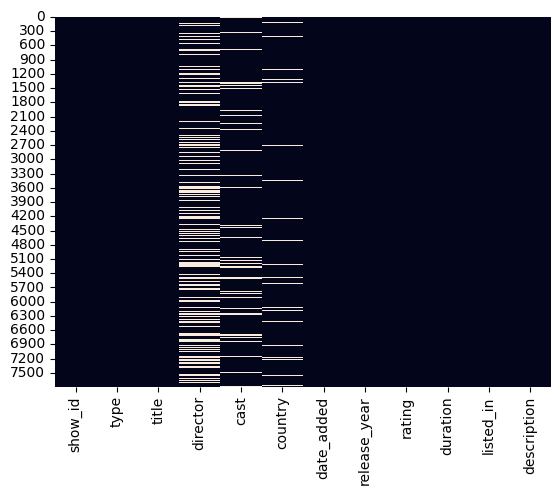

In [10]:
# Visualizing the missing values
sns.heatmap(Netflix_content.isnull(), cbar=False)

### What did you know about your dataset?

The dataset has 7787 rows and 12 columns. There is no duplicate row present in the dataset. The director column has 2389 missing values. 718 values are absent from the cast column. The country column has 507 missing values. 10 values are absent in the date_added column. 7 values are absent from the Ratings column. There are therefore rows in the dataset where the values in these columns are missing, which can have an impact on the analysis or modeling. Handling these missing values correctly is crucial.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
Netflix_content.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
# Dataset Describe

Netflix_content.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

### Variables Description
The dataset comprises 12 columns, which are denoted as follows:

1. show_id : Unique ID for every Movie / TV Show

2. type :  Whether It's A Movie or TV Show

3. title : Name of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / TV show

6. country : Country where the movie / TV show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Release year of the movie / TV show

9. rating : TV Rating of the movie / TV show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. Description: The Summary description of the movie/TV Show

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for column in Netflix_content.columns:
    unique_values = Netflix_content[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for show_id: ['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
Unique values for type: ['TV Show' 'Movie']
Unique values for title: ['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
Unique values for director: [nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
Unique values for cast: ['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'
 'Nasty C' 'Adriano Zumbo, Rachel Khoo']
Unique values for country: ['Brazil' 'Mexico' 'S

## 3. ***Data Wrangling***

### Data Wrangling Code


In [14]:
# Write your code to make your dataset analysis ready.
#Handeling the Missing/Null values
#null values in date_added.
Netflix_content[(Netflix_content['date_added'].isnull())]



show_id     type                                        title director  \
258     s259  TV Show  A Young Doctor's Notebook and Other Stories      NaN   
549     s550  TV Show              Anthony Bourdain: Parts Unknown      NaN   
2263   s2264  TV Show                                      Frasier      NaN   
2288   s2289  TV Show                                      Friends      NaN   
2555   s2556  TV Show                              Gunslinger Girl      NaN   
3374   s3375  TV Show                                     Kikoriki      NaN   
3492   s3493  TV Show                          La Familia P. Luche      NaN   
3946   s3947  TV Show                                        Maron      NaN   
5137   s5138  TV Show                                 Red vs. Blue      NaN   
6065   s6066  TV Show                 The Adventures of Figaro Pho      NaN   

                                                   cast         country  \
258   Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...  United Kingdom   
549                                    Anthony Bourdain   United States   
2263  Kelsey Grammer, Jane Leeves, David Hyde Pierce...   United States   
2288  Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...   United States   
2555  Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...           Japan   
3374                                      Igor Dmitriev             NaN   
3492  Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...   United States   
3946  Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...   United States   
5137  Burnie Burns, Jason Saldaña, Gustavo Sorola, G...   United States   
6065  Luke Jurevicius, Craig Behenna, Charlotte Haml...       Australia   

     date_added  release_year rating    duration  \
258         NaN          2013  TV-MA   2 Seasons   
549         NaN          2018  TV-PG   5 Seasons   
2263        NaN          2003  TV-PG  11 Seasons   
2288        NaN          2003  TV-14  10 Seasons   
2555        NaN          2008  TV-14   2 Seasons   
3374        NaN          2010   TV-Y   2 Seasons   
3492        NaN          2012  TV-14   3 Seasons   
3946        NaN          2016  TV-MA   4 Seasons   
5137        NaN          2015     NR  13 Seasons   
6065        NaN          2015  TV-Y7   2 Seasons   

                                              listed_in  \
258            British TV Shows, TV Comedies, TV Dramas   
549                                          Docuseries   
2263                     Classic & Cult TV, TV Comedies   
2288                     Classic & Cult TV, TV Comedies   
2555                       Anime Series, Crime TV Shows   
3374                                           Kids' TV   
3492  International TV Shows, Spanish-Language TV Sh...   
3946                                        TV Comedies   
5137  TV Action & Adventure, TV Comedies, TV Sci-Fi ...   
6065                              Kids' TV, TV Comedies   

                                            description  
258   Set during the Russian Revolution, this comic ...  
549   This CNN original series has chef Anthony Bour...  
2263  Frasier Crane is a snooty but lovable Seattle ...  
2288  This hit sitcom follows the merry misadventure...  
2555  On the surface, the Social Welfare Agency appe...  
3374  A wacky rabbit and his gang of animal pals hav...  
3492  This irreverent sitcom featues Ludovico, Feder...  
3946  Marc Maron stars as Marc Maron, who interviews...  
5137  This parody of first-person shooter games, mil...  
6065  Imagine your worst fears, then multiply them: ...

In [15]:
#Total no. of null values present in date_added column
Netflix_content.date_added.isnull().sum()


10

There are 10 null values present in the date_added column, and we can't find any value to replace them. So, we need to drop them.

In [16]:
# Remove all the null values in date_added column.
Netflix_content.dropna(subset=['date_added'], inplace=True)
# Checking if all null values are removed from date_added column
Netflix_content.date_added.isnull().sum()


0

In [17]:
# Checking total Number of null values in rating column.
Netflix_content.rating.isnull().sum()

7

In [18]:
#null values in rating column.
Netflix_content[(Netflix_content['rating'].isnull())]

show_id     type                                              title  \
67       s68    Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
2359   s2360  TV Show                  Gargantia on the Verdurous Planet   
3660   s3661  TV Show                                       Little Lunch   
3736   s3737    Movie                                    Louis C.K. 2017   
3737   s3738    Movie                              Louis C.K.: Hilarious   
3738   s3739    Movie               Louis C.K.: Live at the Comedy Store   
4323   s4324    Movie                               My Honor Was Loyalty   

             director                                               cast  \
67                NaN                        Oprah Winfrey, Ava DuVernay   
2359              NaN  Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...   
3660              NaN  Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...   
3736       Louis C.K.                                         Louis C.K.   
3737       Louis C.K.                                         Louis C.K.   
3738       Louis C.K.                                         Louis C.K.   
4323  Alessandro Pepe  Leone Frisa, Paolo Vaccarino, Francesco Miglio...   

            country          date_added  release_year rating  duration  \
67              NaN    January 26, 2017          2017    NaN    37 min   
2359          Japan    December 1, 2016          2013    NaN  1 Season   
3660      Australia    February 1, 2018          2015    NaN  1 Season   
3736  United States       April 4, 2017          2017    NaN    74 min   
3737  United States  September 16, 2016          2010    NaN    84 min   
3738  United States     August 15, 2016          2015    NaN    66 min   
4323          Italy       March 1, 2017          2015    NaN   115 min   

                                 listed_in  \
67                                  Movies   
2359  Anime Series, International TV Shows   
3660                 Kids' TV, TV Comedies   
3736                                Movies   
3737                                Movies   
3738                                Movies   
4323                                Dramas   

                                            description  
67    Oprah Winfrey sits down with director Ava DuVe...  
2359  After falling through a wormhole, a space-dwel...  
3660  Adopting a child's perspective, this show take...  
3736  Louis C.K. muses on religion, eternal love, gi...  
3737  Emmy-winning comedy writer Louis C.K. brings h...  
3738  The comic puts his trademark hilarious/thought...  
4323  Amid the chaos and horror of World War II, a c...

There are 7 null values present in the rating column, which are very few and we can't find any value to replace them. So, we need to drop them.

In [19]:
# Remove all the null values in rating column.
Netflix_content.dropna(subset=['rating'], inplace=True)
# Checking if all null values are removed from rating column
Netflix_content.rating.isnull().sum()

0

In [20]:
#Checking total number of null values present in the dataset now.
Netflix_content.isnull().sum()

show_id            0
type               0
title              0
director        2376
cast             718
country          505
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

Since our aim is to analyze and understand what type of content is available in different countries and if Netflix has been increasingly focusing on TV rather than movies in recent years, So, here, director and cast are irrelevant variables. and they contain a large number of null values, so we can drop them.

In [21]:
#Removing director and cast variable
Netflix_content.drop(["director","cast"], axis =1, inplace =True)
#Checking total number of null values present in the dataset now.
Netflix_content.isnull().sum()


show_id           0
type              0
title             0
country         505
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [22]:
Netflix_content["country"].mode()

0    United States
Name: country, dtype: object

variable country is categorical and had 505 null values in it, we can replace these null values with the most occurring country(mode) which is United States.

In [23]:
#Filling null values in country variable with the mode
Netflix_content['country'].fillna('United States', inplace=True)

**Standardizing the data in each column**

The duration column does not have any missing or duplicate value.

In [24]:
#checking the datatype of duration column
type(Netflix_content.duration.iloc[0][0])

str

Covert all the data in duration variable into numeric datatype.

In [25]:
# Create subsets for tv shows and movies.
tv_shows = Netflix_content[Netflix_content['type'] == 'TV Show']
movies = Netflix_content[Netflix_content['type'] == 'Movie']

# Select the durations for both.
duration_tv_shows = tv_shows['duration'].reset_index()
duration_movies = movies['duration'].reset_index()

# Remove string values from tv shows duration.
duration_tv_shows.duration = duration_tv_shows.duration.str.replace(' Season', '') \
                                                       .str.replace(' Seasons', '') \
                                                       .str.replace('s', '')
duration_tv_shows.duration = duration_tv_shows.duration.astype(str).astype(int)

# Remove string values from movie duration.
duration_movies.duration = duration_movies.duration.str.replace(' min', '')
duration_movies.duration = duration_movies.duration.astype(str).astype(int)


The dates in the "date_added" column are not in the same format. So, we need to standardize them by converting them to a uniform format using the pd.to_datetime() function in pandas. This function can handle various date formats and convert them to a standardized datetime format.

In [26]:
# Convert the 'date_added' column to datetime format
Netflix_content['date_added'] = pd.to_datetime(Netflix_content['date_added'], errors='coerce')

# Print the DataFrame to check the standardized 'date_added' column
print(Netflix_content.head())
full_month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Convert integer month values to abbreviated month names
Netflix_content['month_added'] = Netflix_content['date_added'].dt.month.map(full_month_names)
Netflix_content['day_added'] = Netflix_content['date_added'].dt.day.fillna(0).astype(int)
Netflix_content['year_added'] = Netflix_content['date_added'].dt.year.fillna(0).astype(int)         # Compute year.
      # Compute month.


  show_id     type  title        country date_added  release_year rating  \
0      s1  TV Show     3%         Brazil 2020-08-14          2020  TV-MA   
1      s2    Movie   7:19         Mexico 2016-12-23          2016  TV-MA   
2      s3    Movie  23:59      Singapore 2018-12-20          2011      R   
3      s4    Movie      9  United States 2017-11-16          2009  PG-13   
4      s5    Movie     21  United States 2020-01-01          2008  PG-13   

    duration                                          listed_in  \
0  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1     93 min                       Dramas, International Movies   
2     78 min                Horror Movies, International Movies   
3     80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4    123 min                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthqu

### What all manipulations have you done and insights you found?


* I checked for all the missing values and duplicates that were present in the dataset. There was no duplicate row present in the dataset. The director column had 2389 missing values. 718 values were absent from the cast column. The country column had 507 missing values. 10 values were absent in the date_added column. Seven values were absent from the Ratings column. I dropped the missing values from date_added and rating colum. I filled the null values in the country column with mode.
* To standardize the values present in the date_added column. I converted it to a numeric data type and changed it into a standard date and time format.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1- Proportion of movies and TV shows watched on Netflix

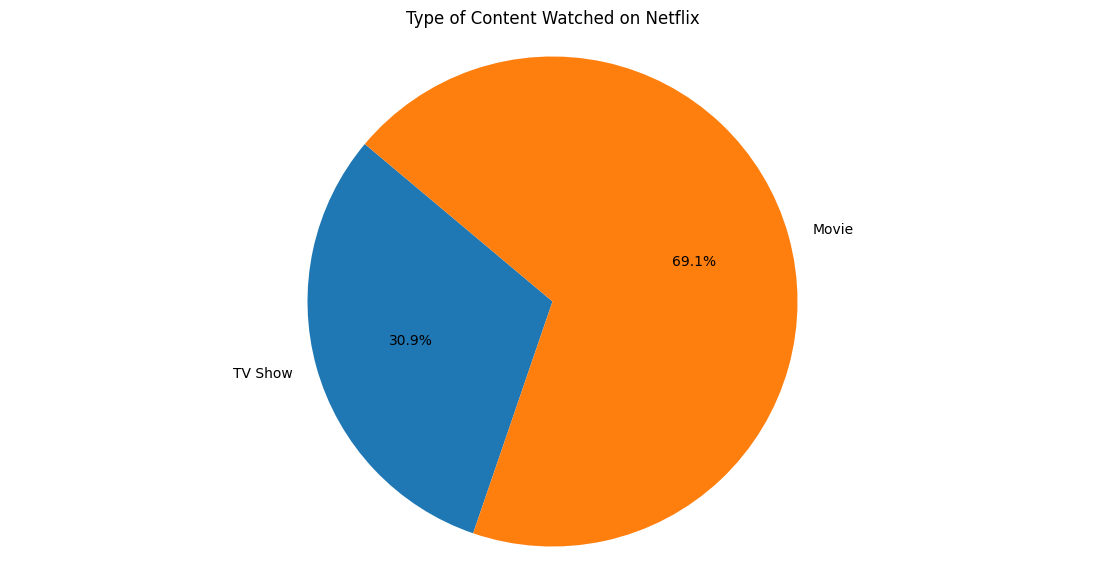

In [27]:
# Chart - 1 visualization code
#Plotting pie chart to show the proportion of movies and TV shows watched on Netflix
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(Netflix_content['type'].value_counts().sort_values(),labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Type of Content Watched on Netflix')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

Since a pie chart clearly illustrates the percentage of various categories inside a whole, I decided to use it to visualize the kind of content that is seen on Netflix. Here, "whole" refers to the entirety of Netflix content viewed, and "whole" means "Movies" and "TV Shows"

##### 2. What is/are the insight(s) found from the chart?

69.1% of the content available on Netflix are movies; the remaining 30.9% are TV Shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix consumers' preference for movies over TV shows can be inferred from the proportions indicated by each slice. This information can be valuable for content creators and distributors when making decisions about content acquisition or production strategies.

#### Chart - 2 - Distribution of movie durations on Netflix.

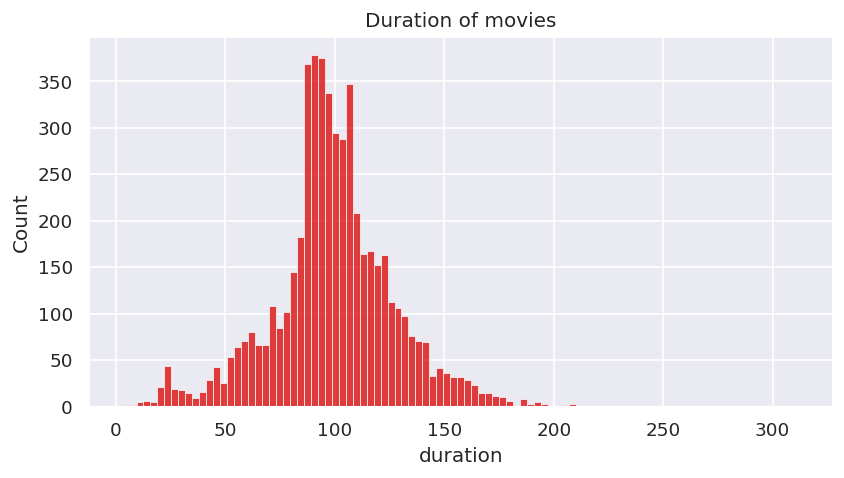

In [28]:
#Plot the duration of movies
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_movies['duration'], color='#db0000')
plt.title('Duration of movies')
plt.show()

##### 1. Why did you pick the specific chart?

The histogram plot is a flexible method of data visualization that provides insightful information about the distributional characteristics of continuous data, such as movie lengths. It strikes a good mix between simplicity and complexity, which makes it appropriate for examining and deciphering the underlying patterns in the data.

##### 2. What is/are the insight(s) found from the chart?

Most of the movies last for 70 to 120 minutes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Knowing the typical duration of movies watched by users can help Netflix **optimize the user experience.** For example, Netflix could recommend movies of similar durations based on a user's viewing history, improving user engagement and satisfaction.
2. The popularity of various film lengths can be used to inform Netflix's licensing and acquisition choices. Netflix may maximize the value of its content library by giving priority to obtaining the rights to movies that match viewer preferences regarding duration.

#### Chart - 3 - Usual number of seasons for TV shows on Netflix

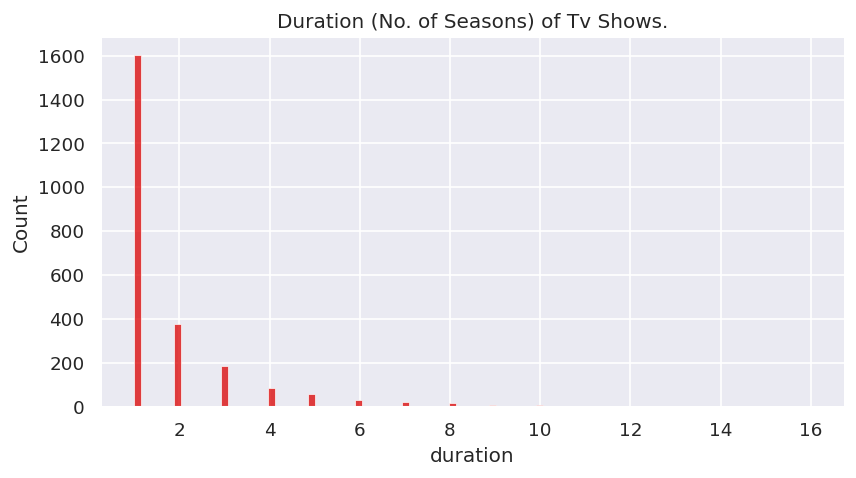

In [29]:
# Plot the durations of TV Shows.
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_tv_shows['duration'], color='#db0000')
plt.title('Duration (No. of Seasons) of Tv Shows.')
plt.show()

##### 1. Why did you pick the specific chart?

 A histogram is a versatile and effective visualization tool for exploring the distribution of TV show durations, providing valuable insights that can inform content curation, production strategies, and user engagement efforts on Netflix.

##### 2. What is/are the insight(s) found from the chart?

The majority of television shows have three seasons at most; more than five seasons are extremely uncommon.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Netflix may boost user engagement and retention rates by suggesting shorter-duration programs to viewers who prefer binge-watching or have limited viewing time. Users that are happy with the platform are more likely to stick with their subscriptions, which helps it expand and succeed.
2. Netflix's content creation strategy can be guided by information about the average number of seasons for TV shows. Rather than focusing on long-running shows, the platform can decide to allocate more funds to the creation of original, limited-season series. The likelihood of creating good content can be increased and resource allocation can be optimized with this focused strategy.

#### Chart - 4 - Top 10 Most Popular Categories

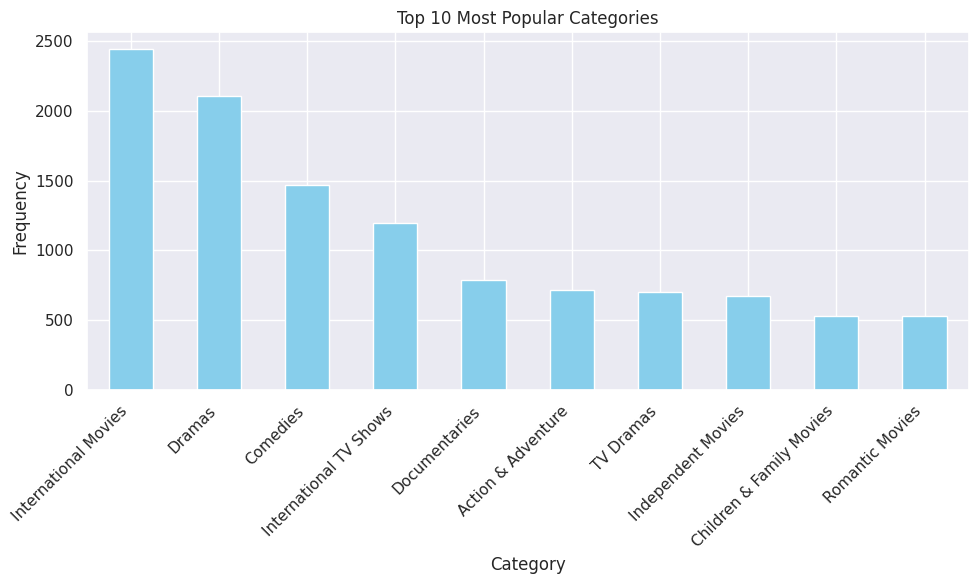

In [30]:
# Chart - 4 visualization code
# Concatenate all categories into a single string and split them into list of individual elements
categories = ", ".join(Netflix_content['listed_in']).split(", ")

# Create a pandas Series from the list of categories and count the occurrences of each category
category_counts = pd.Series(categories).value_counts()

# Select the top 10 most popular categories
top_10_categories = category_counts.head(10)

# Plot the top 10 most popular categories
plt.figure(figsize=(10, 6))
top_10_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot effectively conveys the distribution of the top 10 most popular categories in a clear and straightforward manner, making it a suitable choice for visualizing this type of categorical data.

##### 2. What is/are the insight(s) found from the chart?

According to the chart, viewers strongly love the drama, comedy, and international movie categories, which are among the top categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Finding patterns or trends in the way the categories are distributed can reveal information about how viewer preferences are shifting or about new trends in content. When international films, dramas, and comedies get to the top of the charts, it could be an indication that Netflix should start investing in more of these kinds of shows.

#### Chart - 5 - The most common type of content for each of the top ten countries that produce content

Total Movie Counts for Top 10 Countries:
country
United States     2076
India              852
United Kingdom     193
Japan               69
South Korea         36
Canada             118
Spain               89
France              69
Egypt               89
Mexico              65
Name: Movie, dtype: int64

Total TV Show Counts for Top 10 Countries:
country
United States     975
India              71
United Kingdom    203
Japan             155
South Korea       147
Canada             59
Spain              45
France             46
Egypt              12
Mexico             35
Name: TV Show, dtype: int64


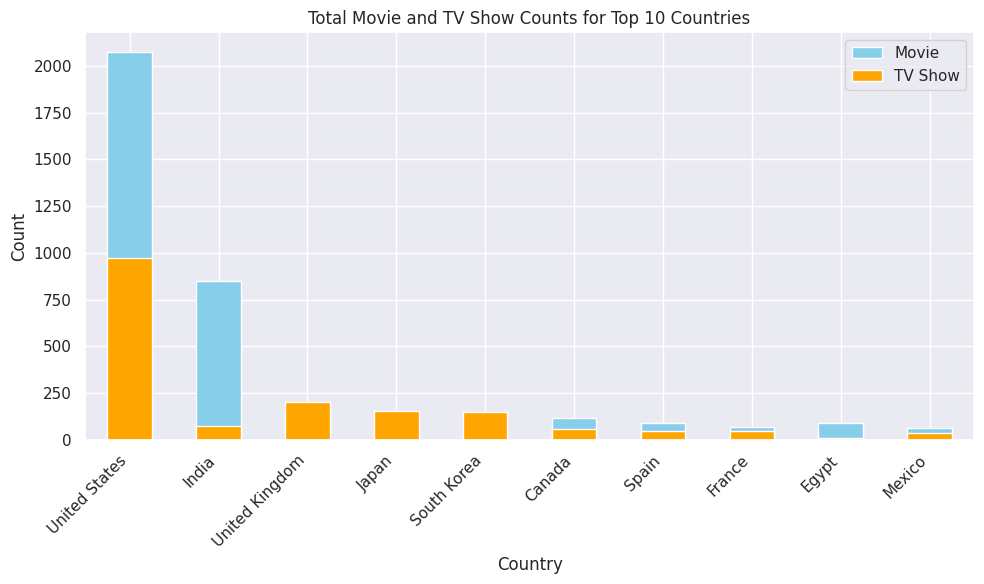

In [31]:
# Chart - 5 visualization code
# Group the data by country and content type, and count the occurrences
country_content_counts = Netflix_content.groupby(['country', 'type']).size().unstack(fill_value=0)
# Sum the counts across movie and TV show content to get the total count of content for each country
country_total_counts = country_content_counts.sum(axis=1)

# Select the top 10 countries with the highest total counts
top_10_countries = country_total_counts.nlargest(10)


# Sum the counts separately for movie and TV show content for each country
country_movie_counts = country_content_counts['Movie']
country_tv_show_counts = country_content_counts['TV Show']

# Calculate the total counts for movie and TV show content for the top 10 countries
top_10_countries_total_movie_counts = country_movie_counts.loc[top_10_countries.index]
top_10_countries_total_tv_show_counts = country_tv_show_counts.loc[top_10_countries.index]

# Print the result
print("Total Movie Counts for Top 10 Countries:")
print(top_10_countries_total_movie_counts)

print("\nTotal TV Show Counts for Top 10 Countries:")
print(top_10_countries_total_tv_show_counts)
# Plot the graph
plt.figure(figsize=(10, 6))
top_10_countries_total_movie_counts.plot(kind='bar', color='skyblue', label='Movie')
top_10_countries_total_tv_show_counts.plot(kind='bar', color='orange', label='TV Show')
plt.title('Total Movie and TV Show Counts for Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar plot effectively conveys the individual counts of movie and TV show content for the top 10 countries in a clear and concise manner, making it a suitable choice for visualizing this type of categorical data.

##### 2. What is/are the insight(s) found from the chart?

Given that Netflix is a US firm, it seems reasonable that the US is a major producer of both kinds of material. Bollywood's impact on India explains the variety of content offered, with movies possibly taking center stage over TV shows in this sector. However, TV shows are more common in South Korea, which helps to explain the current KDrama culture.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding regional preferences for content might help with personalized recommendations and more focused audience segmentation. Streaming platforms can improve user engagement, retention, and happiness by customizing content recommendations based on viewer interests in certain countries.

#### Chart - 6 - Distribution of content additions over different months

Creating a DataFrame 'monthly_content_count' where each row represents a unique month in the 'date_added_month' column, and the corresponding count of occurrences is shown in the second column.

In [32]:
# Count the occurrences of each unique value in the 'date_added_month' column and reset the index
monthly_content_count = Netflix_content["month_added"].value_counts().reset_index()
# Display the DataFrame to verify the changes
monthly_content_count

month_added  count
0     December    816
1      October    780
2      January    745
3     November    730
4        March    660
5    September    613
6       August    611
7        April    595
8         July    592
9         June    538
10         May    537
11    February    465

In [33]:
# Extract the values from the DataFrame
month_names = monthly_content_count['month_added'].values
month_wise_count = monthly_content_count['count'].values

# Display the arrays
print("Month Names:", month_names)
print("Month Wise Count:", month_wise_count)

Month Names: ['December' 'October' 'January' 'November' 'March' 'September' 'August'
 'April' 'July' 'June' 'May' 'February']
Month Wise Count: [816 780 745 730 660 613 611 595 592 538 537 465]


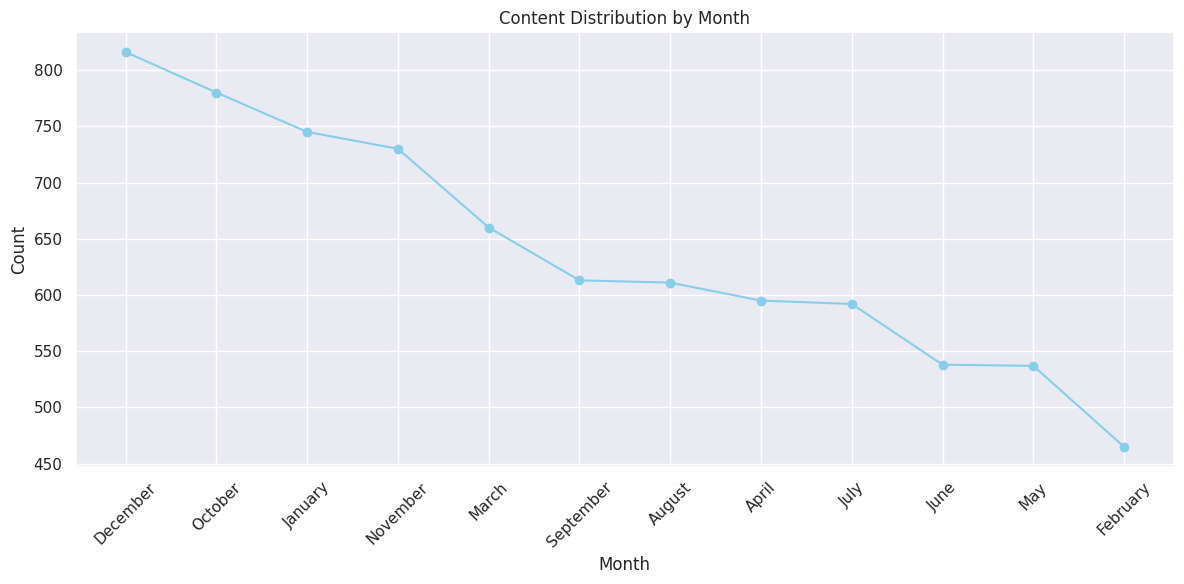

In [34]:
# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(month_names, month_wise_count, marker='o', color='skyblue', linestyle='-')
plt.title('Content Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The line plot provides a clear and intuitive visualization of the distribution of content by month, making it easy to identify trends and patterns over time.

##### 2. What is/are the insight(s) found from the chart?

The majority of the content was uploaded in the month of December, while the least content was uploaded in the month of February.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The content release strategy of streaming platforms can be optimized by having a thorough understanding of seasonal trends and content release patterns. Given that December is both Christmas and the holiday season, the majority of the content was uploaded during that month. Thus,Platforms may boost viewer retention and subscriber numbers by carefully scheduling content releases to align with times of peak audience engagement or demand.

#### Chart - 7 -  The distribution of TV shows based on Age Group ratings.

   show_id     type   title                country date_added  release_year  \
0       s1  TV Show      3%                 Brazil 2020-08-14          2020   
5       s6  TV Show      46                 Turkey 2017-07-01          2016   
11     s12  TV Show    1983  Poland, United States 2018-11-30          2018   
12     s13  TV Show    1994                 Mexico 2019-05-17          2019   
16     s17  TV Show  Feb-09          United States 2019-03-20          2018   

   rating   duration                                          listed_in  \
0   TV-MA  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
5   TV-MA   1 Season    International TV Shows, TV Dramas, TV Mysteries   
11  TV-MA   1 Season  Crime TV Shows, International TV Shows, TV Dramas   
12  TV-MA   1 Season  Crime TV Shows, Docuseries, International TV S...   
16  TV-14   1 Season                  International TV Shows, TV Dramas   

                                          description month_added  day_add

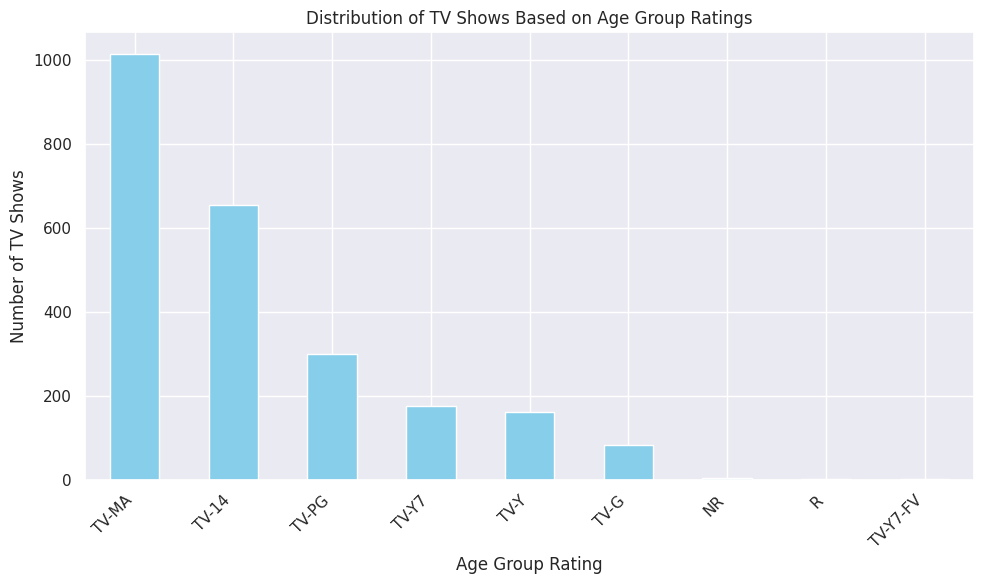

In [35]:
# Chart - 7 visualization code
# Filter the DataFrame to include only TV shows
df_tv_show = Netflix_content[Netflix_content['type'] == 'TV Show']

# Display the first few rows of the filtered DataFrame
print(df_tv_show.head())

# Sort TV shows by ratings in descending order
most_popular_tv_shows = df_tv_show.sort_values(by='rating', ascending=False)

# Display the top 10 most popular TV shows based on ratings
top_10_most_popular_tv_shows = most_popular_tv_shows.head(10)
print(top_10_most_popular_tv_shows)
top_10_most_popular_tv_shows
# Count the number of TV shows for each age group rating category
tv_show_ratings_count = df_tv_show['rating'].value_counts()

# Plot the graph
plt.figure(figsize=(10, 6))
tv_show_ratings_count.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group Rating')
plt.ylabel('Number of TV Shows')
plt.title('Distribution of TV Shows Based on Age Group Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Bar plots are ideal for comparing categorical data, such as different age group ratings. Each bar represents a distinct category (age group rating), making it easy to visually compare the counts of TV shows across these categories.

##### 2. What is/are the insight(s) found from the chart?

Most of the contents are for the TV-MA (for mature audiences), TV-14 (may be unsuitable for children under 14), and TV-PG (parental guidance suggested) age groups. where there is relatively little or no content available for NR (not rated) and R (restricted).. TV-Y7-FV (programs directed to older children and containing more intense or combative fantasy violence) age group.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Comprehending the popularity of age group rating categories enables platforms to efficiently curate their content library. By focusing on purchasing or creating TV series that cater to the broadest demographic segments, they can enhance viewer satisfaction and engagement.

#### Chart - 8 - The Distribution of Movies based on Age Group ratings.

     show_id   type                                              title  \
5573   s5574  Movie                            Shootout at Lokhandwala   
5522   s5523  Movie                                           Sex Doll   
2953   s2954  Movie                                      Immoral Tales   
2484   s2485  Movie                                    Good Luck Chuck   
7728   s7729  Movie                      You Don't Mess with the Zohan   
1662   s1663  Movie                                       Dear Dracula   
3601   s3602  Movie                                       Leo the Lion   
3593   s3594  Movie  LEGO Ninjago: Masters of Spinjitzu: Day of the...   
3668   s3669  Movie                Little Singham aur Kaal ka Mahajaal   
4241   s4242  Movie                          Motu Patlu: King of Kings   

                     country date_added  release_year    rating duration  \
5573                   India 2019-05-15          2007        UR  116 min   
5522  United Kingdom, France 2017

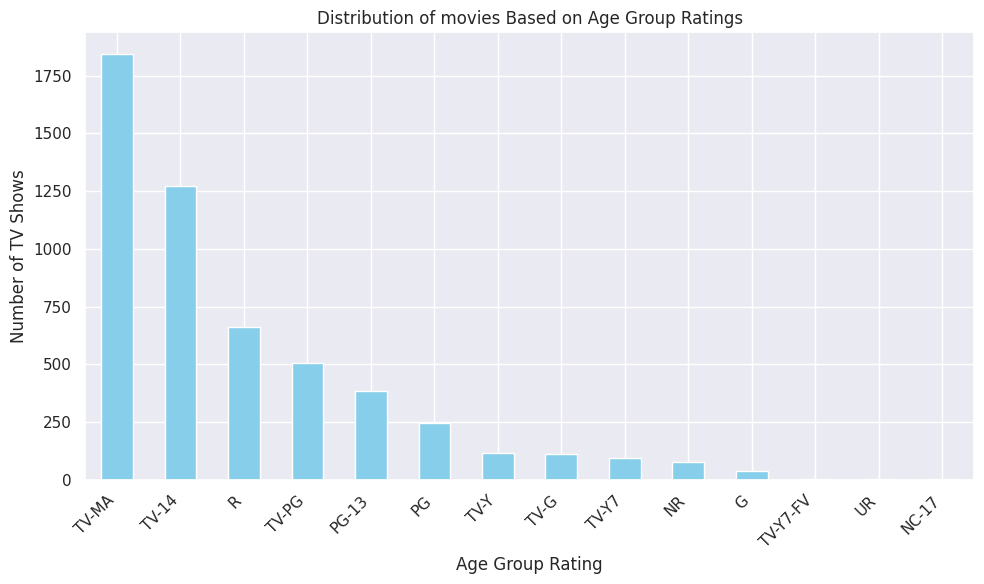

In [36]:
# Chart - 8 visualization
# Filter the DataFrame to include only movies
df_movies = Netflix_content[Netflix_content['type'] == 'Movie']


# Sort movies by ratings in descending order
most_popular_movies = df_movies.sort_values(by='rating', ascending=False)

# Display the top 10 most popular movies based on ratings
top_10_most_popular_movies = most_popular_movies.head(10)
print(top_10_most_popular_movies)
top_10_most_popular_movies
# Count the number of movies for each age group rating category
movies_ratings_count = df_movies['rating'].value_counts()

# Plot the graph
plt.figure(figsize=(10, 6))
movies_ratings_count.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group Rating')
plt.ylabel('Number of TV Shows')
plt.title('Distribution of movies Based on Age Group Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bar plots are ideal for comparing categorical data, such as different age group ratings. Each bar represents a distinct category (age group rating), making it easy to visually compare the counts of TV shows across these categories.

##### 2. What is/are the insight(s) found from the chart?

Most of the contents are for the TV-MA (for mature audiences), TV-14 (may be unsuitable for children under 14),TV-PG (parental guidance suggested) and R (restricted) age groups. where there is relatively little or no content available for NR (not rated),G, UR and.. TV-Y7-FV (programs directed to older children and containing more intense or combative fantasy violence) age group

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Platforms can use insights from the analysis to inform their content acquisition strategy. By focusing on acquiring TV shows that resonate with the most popular age group rating categories like TV-MA, TV-14, platforms can optimize their content offering and differentiate themselves from competitors.

#### Chart - 9 -  Yearly distribution of TV shows, movies, and total content releases for the last 15 years.

type        Movie  TV Show  Total
year_added                       
2008            1        1      2
2009            2        0      2
2010            1        0      1
2011           13        0     13
2012            3        0      3
2013            6        4     10
2014           19        5     24
2015           58       21     79
2016          256      173    429
2017          861      337   1198
2018         1255      405   1660
2019         1497      639   2136
2020         1312      696   2008


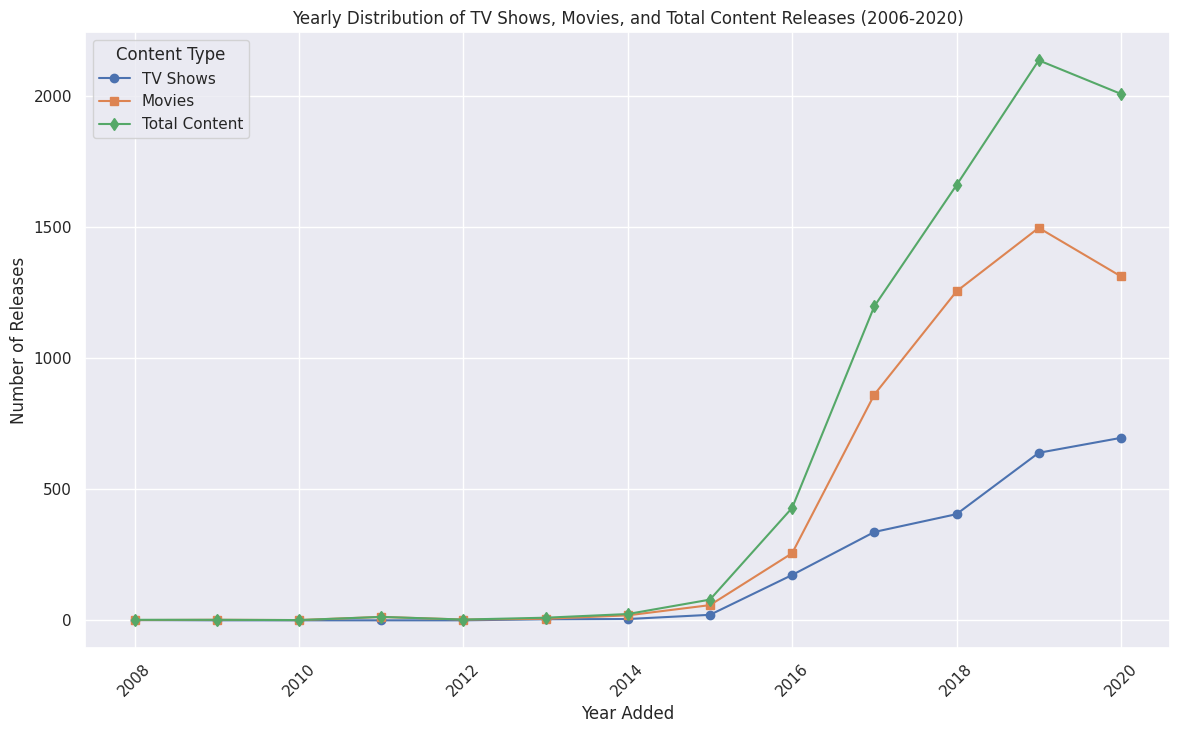

In [37]:
# Set the current year to 2020
current_year = 2020
last_15_years = list(range(current_year - 15, current_year + 1))
filtered_df = Netflix_content[Netflix_content['year_added'].isin(last_15_years)]

# Group by year_added and type, then calculate counts
yearly_distribution = filtered_df.groupby(['year_added', 'type']).size().unstack(fill_value=0)

# Add a total column for each year
yearly_distribution['Total'] = yearly_distribution.sum(axis=1)

# Print the yearly distribution
print(yearly_distribution)

# Plot the yearly distribution using line graph
plt.figure(figsize=(14, 8))

# Plot TV shows
plt.plot(yearly_distribution.index, yearly_distribution.get('TV Show', pd.Series(index=yearly_distribution.index, data=0)), marker='o', label='TV Shows')

# Plot Movies
plt.plot(yearly_distribution.index, yearly_distribution.get('Movie', pd.Series(index=yearly_distribution.index, data=0)), marker='s', label='Movies')

# Plot Total content
plt.plot(yearly_distribution.index, yearly_distribution['Total'], marker='d', label='Total Content')

plt.title('Yearly Distribution of TV Shows, Movies, and Total Content Releases (2006-2020)')
plt.xlabel('Year Added')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A line plot is an effective choice for visualizing the yearly distribution of TV shows, movies, and total content releases as it enables easy comparison of trends over time and facilitates the identification of patterns in the data.

##### 2. What is/are the insight(s) found from the chart?



1. The total number of releases started increasing in 2014 and reached its peak in 2019, but after 2019, it started decreasing.
2. Before 2019, the total number of movies was increasing, but after 2019, the number of movies added decreased, but the number of TV shows added kept on increasing.



















##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact for Netflix.
1. Understanding the increasing popularity of TV shows can help Netflix prioritize investments in high-quality, engaging series that keep viewers subscribed longer.
2. Identifying the peak in total content releases in 2019 and the subsequent decline can help Netflix better plan their production schedules, allocate resources efficiently, and mitigate risks associated with overproduction.
Overall, Insights on the type of content (movies vs. TV shows) can guide Netflix in acquiring content that aligns with viewer preferences, ensuring a more compelling content library that enhances customer satisfaction.


#### Chart - 10 -The days of the month that see the most uploads of content, generally.

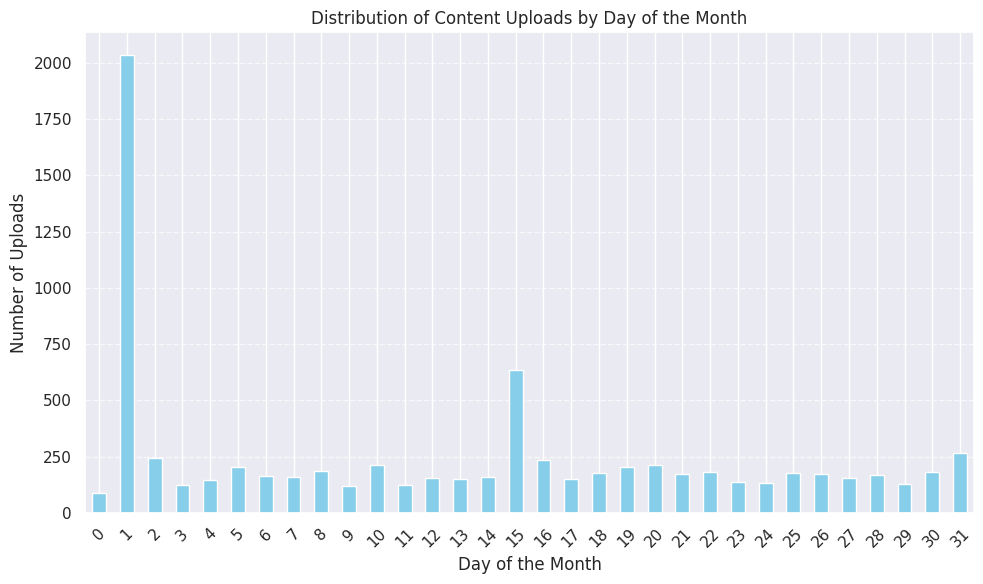

In [38]:
# Chart - 10 visualization code
# Count the occurrences of each day of the month
uploads = Netflix_content['day_added'].value_counts().sort_index()


# Plotting the distribution
plt.figure(figsize=(10, 6))
uploads.plot(kind='bar', color='skyblue')
plt.title('Distribution of Content Uploads by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Uploads')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

The bar chart is an effective tool for visualizing the distribution of content uploads by day of the month because it is clear, simple, and well-suited for categorical data.

##### 2. What is/are the insight(s) found from the chart?

The majority of content is released on the 1st, 15th, and 31st of every month on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Knowing the release schedule allows Netflix to plan and execute targeted marketing campaigns, which can help boost viewership and attract new subscribers.

#### Chart - 11 - Distribution of content releases by year (Netflix offers the majority of the content that was released in these decades.)

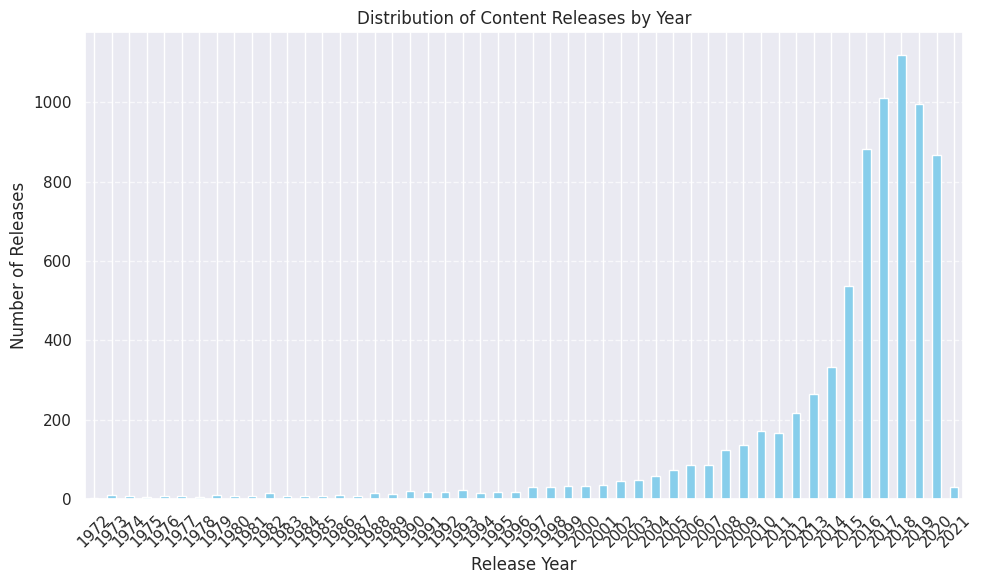

In [39]:
# Chart - 11 visualization code
# Extract the year of release from the relevant column (e.g., 'release_year')
release_years = Netflix_content['release_year']

# Count the occurrences of each release year
yearly_distribution = release_years.value_counts().sort_index().tail(50)

# Plotting the distribution
plt.figure(figsize=(10, 6))
yearly_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Content Releases by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The bar graph was chosen for the "Distribution of Content Releases in Real Time by Year" visualization because it offers a clear, detailed, and easy-to-interpret representation of the total number of actual releases of the content per year that is present on Netflix.

##### 2. What is/are the insight(s) found from the chart?

The majority of the content present on Netflix was released after 2015–2016. Very little content was released before 2015.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Emphasizing newer releases can attract viewers looking for fresh content. Highlighting a diverse array of new content can help attract different viewer demographics and tastes, boosting overall viewership and satisfaction.

#### Chart - 12 - Which words are most frequently used in television program and movie titles?

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Most common words in TV show titles:
[('&', 59), ('Love', 53), ('Power', 27), ('Rangers', 23), ('Life', 19), ('Little', 18), ('World', 18), ('Series', 17), ('Show', 17), ('Girls', 17), ('Time', 17), ('House', 16), ('de', 16), ('La', 16), ('Man', 15)]

Most common words in movie titles:
[('&', 93), ('2', 88), ('Love', 79), ('Christmas', 71), ('Man', 55), ('Story', 53), ('Movie', 46), ('Life', 40), ('World', 40), ('Little', 38), ('One', 37), ('Live', 36), ('Last', 33), ('Time', 33), ('American', 32)]


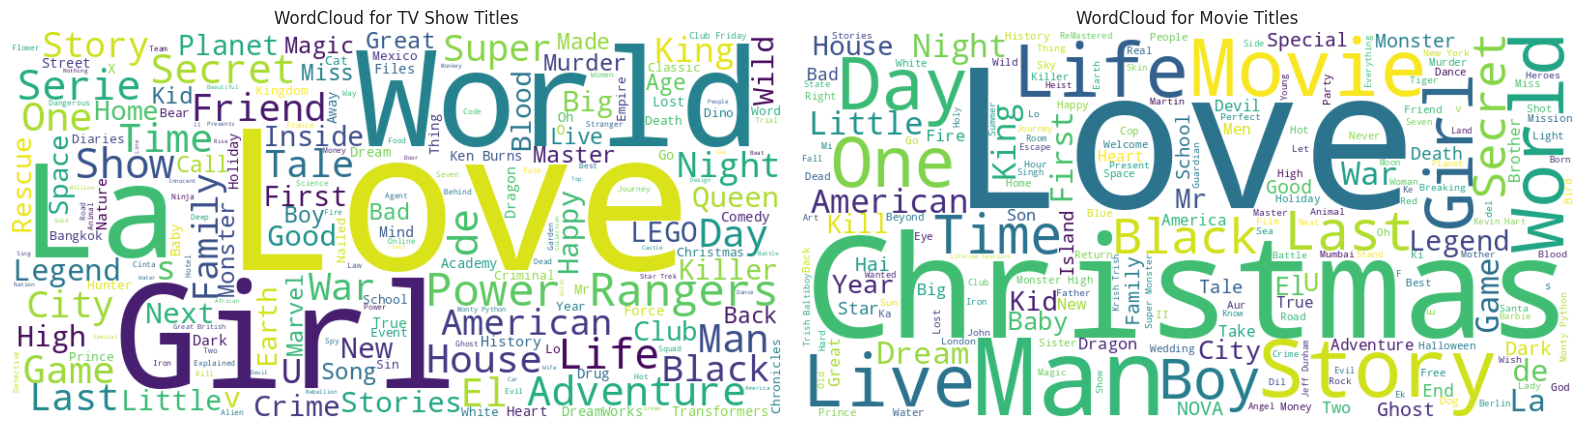

In [40]:
# Chart - 12 visualization code
from collections import Counter
from nltk.corpus import stopwords

# Download stopwords for English language
import nltk
nltk.download('stopwords')

# Concatenate titles into a single text string for TV shows
tv_show_titles_text = ' '.join(tv_shows['title'])

# Concatenate titles into a single text string for movies
movie_titles_text = ' '.join(movies['title'])

# Tokenize the text strings into words
tv_show_titles_words = tv_show_titles_text.split()
movie_titles_words = movie_titles_text.split()

# Remove stopwords from the tokenized words
# Get the list of stopwords for English language
stop_words = set(stopwords.words('english'))
tv_show_titles_words = [word for word in tv_show_titles_words if word.lower() not in stop_words]
movie_titles_words = [word for word in movie_titles_words if word.lower() not in stop_words]

# Count the frequency of each word
tv_show_word_counts = Counter(tv_show_titles_words)
movie_word_counts = Counter(movie_titles_words)

# Get the most common words
most_common_tv_show_words = tv_show_word_counts.most_common(15)
most_common_movie_words = movie_word_counts.most_common(15)

# Print the most common words for TV shows and movies
print("Most common words in TV show titles:")
print(most_common_tv_show_words)

print("\nMost common words in movie titles:")
print(most_common_movie_words)
# Remove stopwords from the text strings

tv_show_titles_text = ' '.join([word for word in tv_show_titles_text.split() if word.lower() not in stop_words])
movie_titles_text = ' '.join([word for word in movie_titles_text.split() if word.lower() not in stop_words])

# Generate WordCloud for TV show titles
wordcloud_tv_show = WordCloud(width=800, height=400, background_color='white').generate(tv_show_titles_text)

# Generate WordCloud for movie titles
wordcloud_movie = WordCloud(width=800, height=400, background_color='white').generate(movie_titles_text)

# Plot the WordCloud images
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_tv_show, interpolation='bilinear')
plt.title('WordCloud for TV Show Titles')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_movie, interpolation='bilinear')
plt.title('WordCloud for Movie Titles')
plt.axis("off")

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Word clouds are chosen for their ability to provide a clear, immediate, and visually engaging representation of the most frequently used words in TV show and movie titles.

##### 2. What is/are the insight(s) found from the chart?

Love, world, girl, and la are the most frequently used words in TV show titles, and Christmas, love, man, and story are the most frequently used words in movie titles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The frequent use of words like "love," "world," "girl," and "la" in TV show titles indicates strong viewer interest in romance, adventure, and female-centric narratives. Netflix can capitalize on these trends by developing more content that aligns with these themes, which can lead to higher viewer engagement and satisfaction.
The frequent use of words like "love," "world," "girl," and "la" in TV show titles indicates strong viewer interest in romance, adventure, and female-centric narratives. Netflix can capitalize on these trends by developing more content that aligns with these themes, which can lead to higher viewer engagement and satisfaction.

#### Chart - 13 - Which words are most frequently used in television program and movie Description?

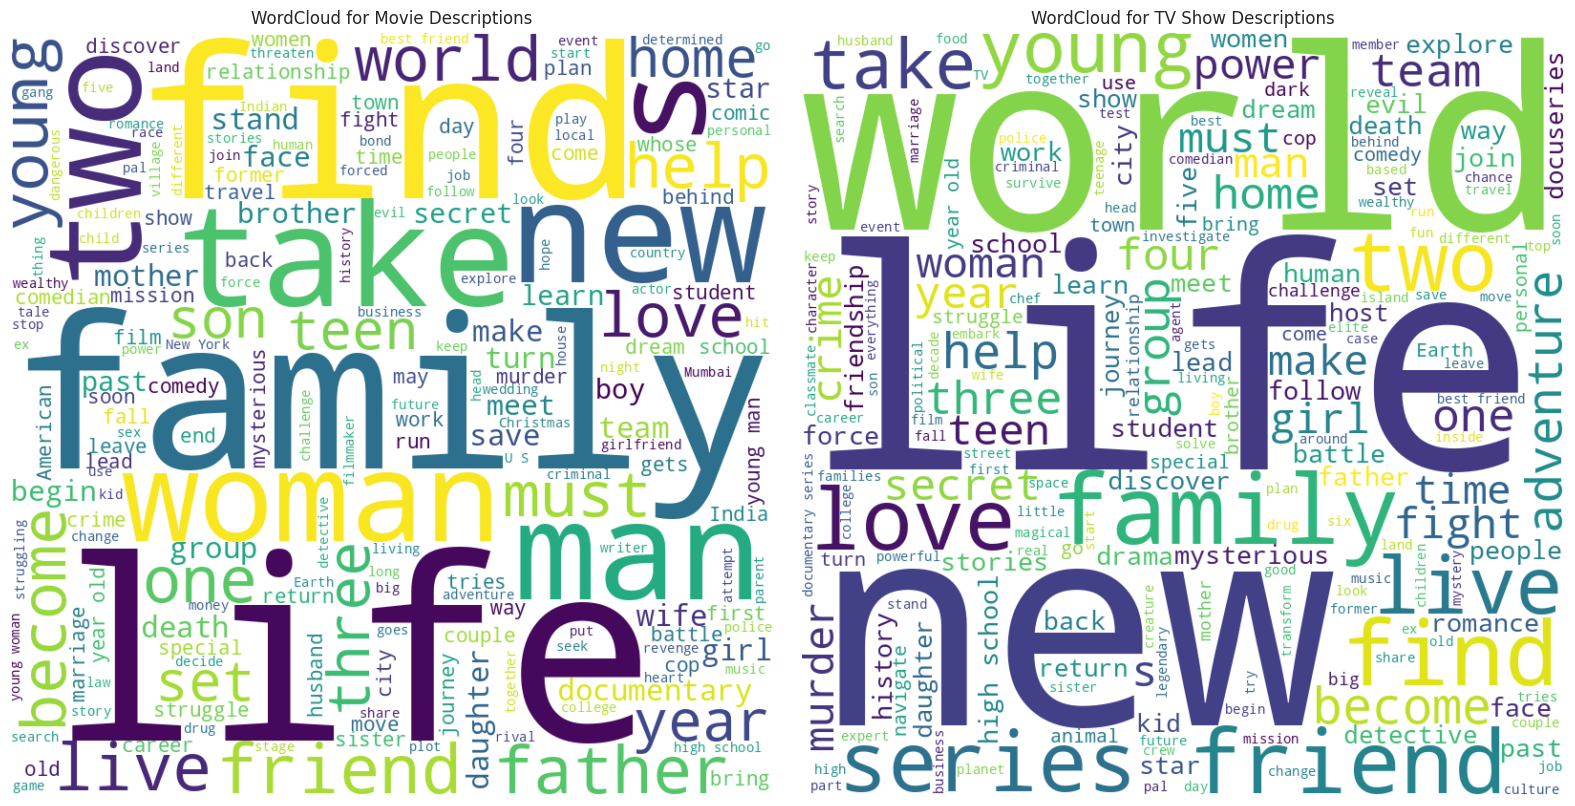

In [41]:
# Chart - 13 visualization code
# Get the stopwords for English

stop_words = set(stopwords.words('english'))

# Function to remove stopwords from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Assuming 'movies' and 'tv_shows' are DataFrames containing the descriptions of movies and TV shows, respectively

# Concatenate all descriptions for movies and TV shows into a single text string
movie_descriptions_text = ' '.join(movies['description'].apply(remove_stopwords))
tv_show_descriptions_text = ' '.join(tv_shows['description'].apply(remove_stopwords))

# Generate WordCloud for movie descriptions
wordcloud_movie = WordCloud(width=800, height=800,
                            background_color='white',
                            stopwords=None,
                            min_font_size=10).generate(movie_descriptions_text)

# Generate WordCloud for TV show descriptions
wordcloud_tv_show = WordCloud(width=800, height=800,
                              background_color='white',
                              stopwords=None,
                              min_font_size=10).generate(tv_show_descriptions_text)

# Plot the WordCloud images
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_movie, interpolation='bilinear')
plt.title('WordCloud for Movie Descriptions')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_tv_show, interpolation='bilinear')
plt.title('WordCloud for TV Show Descriptions')
plt.axis("off")

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Word clouds are chosen for their ability to provide a clear, immediate, and visually engaging representation of the most frequently used words in TV show and movie description.

##### 2. What is/are the insight(s) found from the chart?

Life, Family, Find, new, man, woman are the most frequently used words in Movie description, and World, Life, find, family are the most frequently used words in TV shows description.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The frequent use of words like "life," "family," "find," "new," "man," and "woman" in movie descriptions indicates a strong viewer interest in stories that explore personal relationships, self-discovery, and new experiences. Netflix can leverage this by developing and acquiring more films that focus on these themes, likely resulting in higher engagement and viewer satisfaction.
Using these frequently mentioned words in marketing materials, SEO strategies, and content descriptions can improve the discoverability of content on Netflix's platform and through search engines, driving higher traffic and engagement.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Hypothetical Statement - 1 - Netflix has increasingly focused on TV shows rather than movies in recent years.
2. Hypothetical Statement - 2 - The distribution of content genres may vary across different countries.
3. Hypothetical Statement - 3 - The distribution of content types (movies and TV shows) varies significantly across different age groups ratings.


### Hypothetical Statement - 1 -  Netflix has increasingly focused on TV shows rather than movies in recent years.


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no difference in the proportion of TV shows and movies added each year.

Alternative Hypothesis (H1): There is a significant difference in the proportion of TV shows and movies added each year.

#### 2. Perform an appropriate statistical test.

In [42]:
# Check for unique values in the "year_added" column
unique_years = Netflix_content['year_added'].unique()
print("Unique years:", unique_years)

# Check for missing values
missing_values = Netflix_content['year_added'].isnull().sum()
print("Missing values:", missing_values)

# Clean the "year_added" column (replace or remove any missing or incorrect values)
# Filter out rows where "year_added" is not equal to 0
Netflix_content_filtered = Netflix_content[Netflix_content['year_added'] != 0]

# create the contingency table after cleaning the "year_added" column
hypo_data = pd.crosstab(Netflix_content_filtered['type'], Netflix_content_filtered['year_added'], margins=False)

# Display the contingency table
print(hypo_data)

Unique years: [2020 2016 2018 2017 2019 2021 2015 2013 2011    0 2012 2014 2008 2009
 2010]
Missing values: 0
year_added  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  \
type                                                                           
Movie          1     2     1    13     3     6    19    58   256   861  1255   
TV Show        1     0     0     0     0     4     5    21   173   337   405   

year_added  2019  2020  2021  
type                          
Movie       1497  1312    88  
TV Show      639   696    29  


In [43]:
#Chi-square test of independence to compare proportions of TV shows and movies released in recent years
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

# Perform chi-square test of independence
stat, p, dof, expected = chi2_contingency(hypo_data)

# Print the results
print("Chi-square statistic:", stat)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)









Chi-square statistic: 81.15994817325827
P-value: 6.672179161948897e-12
Degrees of freedom: 13
Expected frequencies: [[1.39859412e+00 1.39859412e+00 6.99297058e-01 9.09086175e+00
  2.09789117e+00 6.99297058e+00 1.67831294e+01 5.52444676e+01
  2.99998438e+02 8.37757876e+02 1.16083312e+03 1.49369852e+03
  1.40418849e+03 8.18177558e+01]
 [6.01405884e-01 6.01405884e-01 3.00702942e-01 3.90913825e+00
  9.02108826e-01 3.00702942e+00 7.21687061e+00 2.37555324e+01
  1.29001562e+02 3.60242124e+02 4.99166884e+02 6.42301484e+02
  6.03811507e+02 3.51822442e+01]]


**The extremely small p-value (6.67×10 ** −12)suggests that the variables the contingency table represents have a considerable relationship with one another. As a result, we might conclude that there is a relationship between the variables and reject the null hypothesis of independence.**

##### Which statistical test have you done to obtain P-Value?

Chi-square test of independence

##### Why did you choose the specific statistical test?

When examining the relationship between two categorical variables, the chi-square test of independence is a suitable tool. The chi-square test determines if the two categorical variables significantly correlate with one another. The objective of this analysis is to determine if there is a substantial difference between the actual frequency distribution and the expected distribution in the case of two independent variables.

### Hypothetical Statement - 2 -  The distribution of content genres may vary across different countries.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The distribution of content genres is the same across all countries.

Alternative Hypothesis (H1): The distribution of content genres varies across different countries.

#### 2. Perform an appropriate statistical test.

In [44]:
# subset dataset and split
genre = Netflix_content["listed_in"].apply(lambda t: t.split(", "))
genre = list(genre)
genre
from collections import Counter

# Flatten the list of lists
flat_genre_list = [genre for sublist in genre for genre in sublist]
# Convert the list to a DataFrame
genres_df = pd.DataFrame({'genre': flat_genre_list})

# Assign the new DataFrame as a new column in Netflix_content
Netflix_content['genre'] = genres_df['genre']

# Group the data by country and genre, and count occurrences
country_genre_counts = Netflix_content.groupby(['country', 'genre']).size().reset_index(name='country_genre_counts')
# Pivot the DataFrame to create a contingency table with rows as genres and columns as country names
contingency_table = country_genre_counts.pivot(index='genre', columns='country', values='country_genre_counts').fillna(0).astype(int)

# Display the values
print(contingency_table)








country                       Argentina  \
genre                                     
Action & Adventure                    3   
Anime Features                        0   
Anime Series                          0   
British TV Shows                      0   
Children & Family Movies              3   
Classic & Cult TV                     0   
Classic Movies                        0   
Comedies                              4   
Crime TV Shows                        1   
Cult Movies                           1   
Documentaries                         2   
Docuseries                            1   
Dramas                                1   
Faith & Spirituality                  0   
Horror Movies                         3   
Independent Movies                    1   
International Movies                 12   
International TV Shows                4   
Kids' TV                              0   
Korean TV Shows                       1   
LGBTQ Movies                          0   
Movies     

In [45]:
from scipy.stats import chi2_contingency

# Create the contingency table
# Replace contingency_table with your actual contingency table
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-square statistic:", chi2_stat)
print("Degrees of freedom:", dof)
print("P-value:", p_val)

Chi-square statistic: 27763.600150410806
Degrees of freedom: 27880
P-value: 0.6882160541440078


**Since the p-value is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. This suggests that there is no significant association between genres and countries in the Netflix dataset.**

##### Which statistical test have you done to obtain P-Value?

Chi-square test of independence

##### Why did you choose the specific statistical test?

When examining the relationship between two categorical variables, the chi-square test of independence is a suitable tool. The chi-square test determines if the two categorical variables significantly correlate with one another. The objective of this analysis is to determine if there is a substantial difference between the actual frequency distribution and the expected distribution in the case of two independent variables.

### Hypothetical Statement - 3 - The distribution of content types (movies and TV shows) varies significantly across different age groups ratings.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the distribution of content types (movies and TV shows) across different age groups ratings.

Alternative Hypothesis (H1): There is a significant difference in the distribution of content types (movies and TV shows) across different age groups ratings.

#### 2. Perform an appropriate statistical test.

In [46]:
# Perform Statistical Test to obtain P-Value
# Group the data by age group and content type, and count occurrences
contingency_data = Netflix_content.groupby(['rating', 'type']).size().reset_index(name='count')

# Pivot the DataFrame to create the contingency table
contingency_table = contingency_data.pivot(index='rating', columns='type', values='count').fillna(0).astype(int)

# Display the contingency table
print(contingency_table)

from scipy.stats import chi2_contingency

# Create the contingency table
# Replace contingency_table with your actual contingency table
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-square statistic:", chi2_stat)
print("Degrees of freedom:", dof)
print("P-value:", p_val)

type      Movie  TV Show
rating                  
G            39        0
NC-17         3        0
NR           79        4
PG          247        0
PG-13       386        0
R           663        2
TV-14      1272      656
TV-G        111       83
TV-MA      1845     1016
TV-PG       505      299
TV-Y        117      162
TV-Y7        95      175
TV-Y7-FV      5        1
UR            5        0
Chi-square statistic: 930.2390474658954
Degrees of freedom: 13
P-value: 1.6546187394507098e-190


The chi-square test of independence generated a p-value of roughly 1.65 * 10**−190. The null hypothesis is strongly rejected by this incredibly small p-value, which reveals a significant correlation between the age groups ratings and the content types (movies and TV shows).
We find that there is a substantial difference in the distribution of content types across different age groups ratings. This suggests that the distribution of content categories on the platform is heavily influenced by age group ratings.

##### Which statistical test have you done to obtain P-Value?

Chi-square test of independence

##### Why did you choose the specific statistical test?

When examining the relationship between two categorical variables, the chi-square test of independence is a suitable tool. The chi-square test determines if the two categorical variables significantly correlate with one another. The objective of this analysis is to determine if there is a substantial difference between the actual frequency distribution and the expected distribution in the case of two independent variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [47]:
Netflix_content.isnull().sum()

show_id          0
type             0
title            0
country          0
date_added      88
release_year     0
rating           0
duration         0
listed_in        0
description      0
month_added     88
day_added        0
year_added       0
genre            0
dtype: int64

In [48]:
Netflix_content[(Netflix_content['date_added'].isnull())]

show_id     type                        title  \
284     s285  TV Show              Abnormal Summit   
556     s557  TV Show                     忍者ハットリくん   
690     s691  TV Show                Bad Education   
819     s820  TV Show  Being Mary Jane: The Series   
902     s903  TV Show     Big Dreams, Small Spaces   
...      ...      ...                          ...   
6950   s6951  TV Show                   The Tudors   
6996   s6997  TV Show                The West Wing   
7446   s7447  TV Show                      Vroomiz   
7522   s7523  TV Show   Weird Wonders of the World   
7653   s7654  TV Show            Women Behind Bars   

                                             country date_added  release_year  \
284                                      South Korea        NaT          2017   
556                                            Japan        NaT          2012   
690                                   United Kingdom        NaT          2014   
819                                    United States        NaT          2016   
902                                   United Kingdom        NaT          2017   
...                                              ...        ...           ...   
6950  Ireland, Canada, United States, United Kingdom        NaT          2010   
6996                                   United States        NaT          2005   
7446                                     South Korea        NaT          2016   
7522                                  United Kingdom        NaT          2016   
7653                                   United States        NaT          2010   

     rating   duration                                          listed_in  \
284   TV-PG  2 Seasons  International TV Shows, Korean TV Shows, Stand...   
556   TV-Y7  2 Seasons                             Anime Series, Kids' TV   
690   TV-MA  3 Seasons                      British TV Shows, TV Comedies   
819   TV-14  4 Seasons                       Romantic TV Shows, TV Dramas   
902    TV-G  3 Seasons  British TV Shows, International TV Shows, Real...   
...     ...        ...                                                ...   
6950  TV-MA  4 Seasons                                          TV Dramas   
6996  TV-14  7 Seasons                                          TV Dramas   
7446   TV-Y  3 Seasons                          Kids' TV, Korean TV Shows   
7522  TV-PG  2 Seasons  British TV Shows, Docuseries, Science & Nature TV   
7653  TV-14  3 Seasons                         Crime TV Shows, Docuseries   

                                            description month_added  \
284   Led by a trio of Korean celebs, a multinationa...         NaN   
556   Hailing from the mountains of Iga, Kanzo Hatto...         NaN   
690   A history teacher at the posh Abbey Grove, Alf...         NaN   
819   Ambitious single TV journalist Mary Jane attem...         NaN   
902   Writer and presenter Monty Don helps England's...         NaN   
...                                                 ...         ...   
6950  All the splendor and scandal of England's 16th...         NaN   
6996  This powerful political epic chronicles the tr...         NaN   
7446  For these half-car, half-animal friends, each ...         NaN   
7522  From animal oddities and bizarre science to me...         NaN   
7653  This reality series recounts true stories of w...         NaN   

      day_added  year_added                 genre  
284           0           0                Dramas  
556           0           0         Documentaries  
690           0           0    Action & Adventure  
819           0           0       Stand-Up Comedy  
902           0           0  International Movies  
...         ...         ...                   ...  
6950          0           0           TV Comedies  
6996          0           0         Documentaries  
7446          0           0             TV Dramas  
7522          0           0    Action & Adventure  
7653          0           0      

Since there are few null values present is date_added column, and we can't find the day_added, month_added or year_added for those rows. All values are null. So, we need to drop these rows.

In [49]:
# Remove all the null values in date_added column.
Netflix_content.dropna(subset=['date_added'], inplace=True)
#Checking for the null values now
Netflix_content.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
day_added       0
year_added      0
genre           0
dtype: int64

### 2. Handling Outliers

<Axes: ylabel='release_year'>

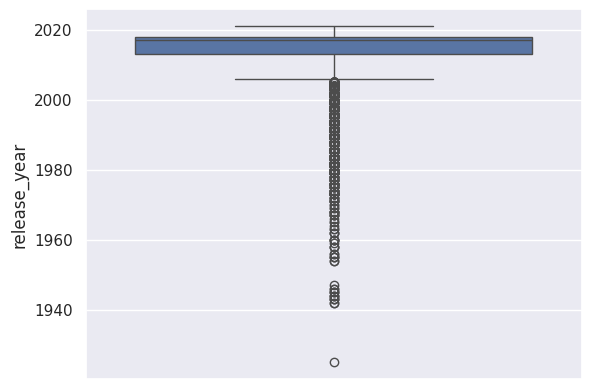

In [50]:
# Handling Outliers & Outlier treatments
#Checking outliers in the release_year column
sns.boxplot(Netflix_content.release_year)

This graph shows the values before 2010 as outliers. And also, we have seen in the graph above that very few movies were released before the year 2010.


<Axes: ylabel='release_year'>

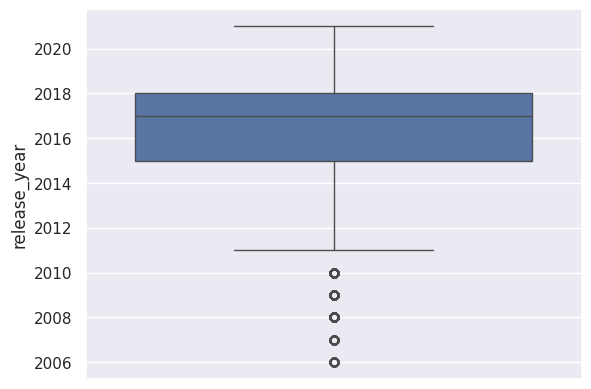

In [51]:
# Calculate the median value of the feature
median_value = Netflix_content['release_year'].median()

# Identify outliers  (values that are more than 3 interquartile ranges away from the median)
Q1 = Netflix_content['release_year'].quantile(0.25)
Q3 = Netflix_content['release_year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Replace outliers with the median value
Netflix_content.loc[Netflix_content['release_year'] < lower_bound, 'release_year'] = median_value
Netflix_content.loc[Netflix_content['release_year'] > upper_bound, 'release_year'] = median_value

#Checking outliers in the release_year column
sns.boxplot(Netflix_content.release_year)

##### What all outlier treatment techniques have you used and why did you use those techniques?


I tried the Replacement with Median technique here. The majority of the data is concentrated in a narrow range, such as after 2015 in this case, and there was relatively little data before 2014. This can indeed lead to a skewed distribution, and this technique is best suited for skewed data. This technique replaces outliers with the median value of that variable. It maintains the overall distribution of the data.


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

1. Expand Contraction

In [52]:
# Expand Contraction
import re

contractions_dict = {
    "can't": "cannot",
    "won't": "will not",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it's": "it is",
    "didn't": "did not",
    "let's": "let us",
    "they're": "they are",
    "don't": "do not"
}

# Function to expand contractions
def expand_contractions(text, contraction_mapping):
    pattern = re.compile(r'\b(' + '|'.join(contraction_mapping.keys()) + r')\b')
    return pattern.sub(lambda x: contraction_mapping[x.group()], text)

# Apply the function to the 'title', 'description', and 'listed_in' columns
Netflix_content['title_expanded'] = Netflix_content['title'].apply(lambda x: expand_contractions(x, contractions_dict))
Netflix_content['description_expanded'] = Netflix_content['description'].apply(lambda x: expand_contractions(x, contractions_dict))
Netflix_content['listed_in_expanded'] = Netflix_content['listed_in'].apply(lambda x: expand_contractions(x, contractions_dict))

# Display the DataFrame
print(Netflix_content[['title', 'title_expanded', 'listed_in', 'listed_in_expanded', 'description', 'description_expanded']])

                                        title  \
0                                          3%   
1                                        7:19   
2                                       23:59   
3                                           9   
4                                          21   
...                                       ...   
7782                                     Zozo   
7783                                   Zubaan   
7784                        Zulu Man in Japan   
7785                    Zumbo's Just Desserts   
7786  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                               title_expanded  \
0                                          3%   
1                                        7:19   
2                                       23:59   
3                                           9   
4                                          21   
...                                       ...   
7782                                     Zozo   
7783               

### 1.2 Categorical Encoding

In [53]:
# Initialize LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode 'rating' column
Netflix_content['rating_encoded'] = label_encoder.fit_transform(Netflix_content['rating'])

# One-Hot Encoding 'type' and 'country' columns, retaining original columns
one_hot_encoded = pd.get_dummies(Netflix_content, columns=['type', 'country'], drop_first=False)

# Split the 'listed_in' column into multiple binary columns
genres = Netflix_content['listed_in_expanded'].str.get_dummies(sep=', ')

# Concatenate the original dataframe with the new genres dataframe
Netflix_content = pd.concat([one_hot_encoded, genres], axis=1)

# Display the dataframe
print(Netflix_content)

     show_id                                    title date_added  \
0         s1                                       3% 2020-08-14   
1         s2                                     7:19 2016-12-23   
2         s3                                    23:59 2018-12-20   
3         s4                                        9 2017-11-16   
4         s5                                       21 2020-01-01   
...      ...                                      ...        ...   
7782   s7783                                     Zozo 2020-10-19   
7783   s7784                                   Zubaan 2019-03-02   
7784   s7785                        Zulu Man in Japan 2020-09-25   
7785   s7786                    Zumbo's Just Desserts 2020-10-31   
7786   s7787  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS 2020-03-01   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-

#### What all categorical encoding techniques have you used & why did you use those techniques?

1. Label Encoding is used for 'Rating' column, because this technique is useful where the categories have an inherent order. In this example,  rating has an inherent order.
2. One-Hot Encoding is used for 'Type' and 'country' column, because this technique is useful for nominal categorical columns where the categories do not have an inherent order.
3. The listed_in column contains multiple genres.So, i used  custom method to handle this column.


#### 2. Lower Casing

In [54]:
# Lower Casing
# Convert the expanded text columns to lowercase
Netflix_content['title_expanded'] = Netflix_content['title_expanded'].str.lower()
Netflix_content['description_expanded'] = Netflix_content['description_expanded'].str.lower()
Netflix_content['listed_in_expanded'] = Netflix_content['listed_in_expanded'].str.lower()

# Display the DataFrame
print(Netflix_content[['title_expanded', 'description_expanded', 'listed_in_expanded']])

                               title_expanded  \
0                                          3%   
1                                        7:19   
2                                       23:59   
3                                           9   
4                                          21   
...                                       ...   
7782                                     zozo   
7783                                   zubaan   
7784                        zulu man in japan   
7785                    zumbo's just desserts   
7786  zz top: that little ol' band from texas   

                                   description_expanded  \
0     in a future where the elite inhabit an island ...   
1     after a devastating earthquake hits mexico cit...   
2     when an army recruit is found dead, his fellow...   
3     in a postapocalyptic world, rag-doll robots hi...   
4     a brilliant group of students become card-coun...   
...                                                 ...  

#### 3. Removing Punctuations

In [55]:
import string
#fill the null values if present with an empty string
Netflix_content['title_expanded'] = Netflix_content['title_expanded'].fillna('')
# defining cluster_df dataframe
cluster_df = Netflix_content[['title_expanded']].copy()
cluster_df['description_expanded'] = Netflix_content['description_expanded']
cluster_df['listed_in_expanded'] = Netflix_content['listed_in_expanded']

cluster_df['cluster_data'] = (Netflix_content['description_expanded'] +' ' + Netflix_content['title_expanded'] + ' ' + Netflix_content['listed_in_expanded'] ).astype(str)
print(cluster_df)
# Function to remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)  # Create a translation table
    return text.translate(translator)  # Use translate function to remove punctuations

# Apply the function to the expanded columns
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)

# Display the modified DataFrame
print(cluster_df.head())

                               title_expanded  \
0                                          3%   
1                                        7:19   
2                                       23:59   
3                                           9   
4                                          21   
...                                       ...   
7782                                     zozo   
7783                                   zubaan   
7784                        zulu man in japan   
7785                    zumbo's just desserts   
7786  zz top: that little ol' band from texas   

                                   description_expanded  \
0     in a future where the elite inhabit an island ...   
1     after a devastating earthquake hits mexico cit...   
2     when an army recruit is found dead, his fellow...   
3     in a postapocalyptic world, rag-doll robots hi...   
4     a brilliant group of students become card-coun...   
...                                                 ...  

#### 4. Removing URLs & Removing words and digits contain digits.

In [56]:
# Remove URLs & Remove words and digits contain digits
import re

def remove_urls(text):
    '''A function for removing URLs'''
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_words_with_digits(text):
    '''A function for removing words containing digits'''
    words = text.split()
    words = [word for word in words if not re.search(r'\d', word)]
    return ' '.join(words)

# Applying the functions to the 'cluster_data' column
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_urls).apply(remove_words_with_digits)
cluster_df.head(2)

title_expanded                               description_expanded  \
0             3%  in a future where the elite inhabit an island ...   
1           7:19  after a devastating earthquake hits mexico cit...   

                                  listed_in_expanded  \
0  international tv shows, tv dramas, tv sci-fi &...   
1                       dramas, international movies   

                                        cluster_data  
0  in a future where the elite inhabit an island ...  
1  after a devastating earthquake hits mexico cit...

#### 5. Removing Stopwords & Removing White spaces

In [57]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    '''A function for removing stopwords'''
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_stopwords)
cluster_df.head(2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


title_expanded                               description_expanded  \
0             3%  in a future where the elite inhabit an island ...   
1           7:19  after a devastating earthquake hits mexico cit...   

                                  listed_in_expanded  \
0  international tv shows, tv dramas, tv sci-fi &...   
1                       dramas, international movies   

                                        cluster_data  
0  future elite inhabit island paradise far crowd...  
1  devastating earthquake hits mexico city trappe...

In [58]:
# Remove White spaces
def remove_extra_whitespaces(text):
    '''A function for removing extra whitespaces'''
    # Remove leading and trailing white spaces
    text = text.strip()
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    return text
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_extra_whitespaces)
cluster_df.head(2)

title_expanded                               description_expanded  \
0             3%  in a future where the elite inhabit an island ...   
1           7:19  after a devastating earthquake hits mexico cit...   

                                  listed_in_expanded  \
0  international tv shows, tv dramas, tv sci-fi &...   
1                       dramas, international movies   

                                        cluster_data  
0  future elite inhabit island paradise far crowd...  
1  devastating earthquake hits mexico city trappe...

#### 7. Tokenization

In [59]:
# Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
# Tokenize the text
cluster_df['cluster_data_tokens'] = cluster_df['cluster_data'].apply(word_tokenize)
cluster_df.head(2)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


title_expanded                               description_expanded  \
0             3%  in a future where the elite inhabit an island ...   
1           7:19  after a devastating earthquake hits mexico cit...   

                                  listed_in_expanded  \
0  international tv shows, tv dramas, tv sci-fi &...   
1                       dramas, international movies   

                                        cluster_data  \
0  future elite inhabit island paradise far crowd...   
1  devastating earthquake hits mexico city trappe...   

                                 cluster_data_tokens  
0  [future, elite, inhabit, island, paradise, far...  
1  [devastating, earthquake, hits, mexico, city, ...

#### 8. Text Normalization

In [60]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
!pip install contractions
from contractions import fix

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Initialize the WordNetLemmatizer and porterstemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()


# Lemmatize tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token.lower()) for token in tokens]

cluster_df['cluster_data_tokens'] = cluster_df['cluster_data_tokens'].apply(lemmatize_tokens)

# Display the first few rows to check the results
print(cluster_df.head(5))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 13.0 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


  title_expanded                               description_expanded  \
0             3%  in a future where the elite inhabit an island ...   
1           7:19  after a devastating earthquake hits mexico cit...   
2          23:59  when an army recruit is found dead, his fellow...   
3              9  in a postapocalyptic world, rag-doll robots hi...   
4             21  a brilliant group of students become card-coun...   

                                  listed_in_expanded  \
0  international tv shows, tv dramas, tv sci-fi &...   
1                       dramas, international movies   
2                horror movies, international movies   
3  action & adventure, independent movies, sci-fi...   
4                                             dramas   

                                        cluster_data  \
0  future elite inhabit island paradise far crowd...   
1  devastating earthquake hits mexico city trappe...   
2  army recruit found dead fellow soldiers forced...   
3  postapoca

##### Which text normalization technique have you used and why?

Text Normalization includes formatting the text in a consistent way, which enhances text processing activities' precision and efficacy.
Text normalization entails the following primary steps:

1. Lowercasing
2. Removing punctuation
3. Removing stop words
4. Expanding contractions
5. Tokenization
6. Lemmatization and stemming the tokens
Here we have used lemmatization in place of stemming because Lemmatization reduces inflected words to their lemma, which is an existing word. On the contrary, stemming can reduce words to a stem that is not an existing word. So, Lemmatization is more accurate.




#### 9. Part of speech tagging

In [61]:
# POS tagging
nltk.download('averaged_perceptron_tagger')

def pos_tagging(tokens):
    return nltk.pos_tag(tokens)

cluster_df['pos_tags'] = cluster_df['cluster_data_tokens'].apply(pos_tagging)

# Display the first few rows to check the results
print(cluster_df.head(2))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


  title_expanded                               description_expanded  \
0             3%  in a future where the elite inhabit an island ...   
1           7:19  after a devastating earthquake hits mexico cit...   

                                  listed_in_expanded  \
0  international tv shows, tv dramas, tv sci-fi &...   
1                       dramas, international movies   

                                        cluster_data  \
0  future elite inhabit island paradise far crowd...   
1  devastating earthquake hits mexico city trappe...   

                                 cluster_data_tokens  \
0  [future, elite, inhabit, island, paradise, far...   
1  [devastating, earthquake, hit, mexico, city, t...   

                                            pos_tags  
0  [(future, JJ), (elite, JJ), (inhabit, NN), (is...  
1  [(devastating, VBG), (earthquake, NN), (hit, V...  


#### 10. Text Vectorization

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert tokens back to strings for vectorization
cluster_df['cluster_data_cleaned'] = cluster_df['cluster_data_tokens'].apply(lambda tokens: ' '.join(tokens))
print(cluster_df.head(2))

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cluster_df['cluster_data_cleaned'])







  title_expanded                               description_expanded  \
0             3%  in a future where the elite inhabit an island ...   
1           7:19  after a devastating earthquake hits mexico cit...   

                                  listed_in_expanded  \
0  international tv shows, tv dramas, tv sci-fi &...   
1                       dramas, international movies   

                                        cluster_data  \
0  future elite inhabit island paradise far crowd...   
1  devastating earthquake hits mexico city trappe...   

                                 cluster_data_tokens  \
0  [future, elite, inhabit, island, paradise, far...   
1  [devastating, earthquake, hit, mexico, city, t...   

                                            pos_tags  \
0  [(future, JJ), (elite, JJ), (inhabit, NN), (is...   
1  [(devastating, VBG), (earthquake, NN), (hit, V...   

                                cluster_data_cleaned  
0  future elite inhabit island paradise far crowd...  


##### Which text vectorization technique have you used and why?

Given that TF-IDF (Term Frequency-Inverse Document Frequency) vectorization is a popular method for text vectorization, I choose to apply it. TF-IDF considers a word's significance in a document in relation to its frequency in all documents. This lessens the impact of common words that appear often in all documents (stop words) while also capturing the discriminative potential of words. When working with text data for tasks like information retrieval, document categorization, and clustering, TF-IDF is especially helpful. It gives text data a numerical form that makes it simple to employ as machine learning model input.

### 4. Feature Manipulation & Selection

We'll use the entire TF-IDF matrix here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Data Tranformation is already performed during scaling, encoding and Normalization.

### 6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, Dimensionality reduction is necessary to handle high-dimensional data effectively.

1. Here Original shape of data: (7682, 1000). So, Dimensionality reduction can help in filtering out noise and redundant information, leading to cleaner and more interpretable data.



In [63]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())




##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

PCA was used because it successfully lowers the dataset's dimensionality while preserving the most important data. Because of this, it is a great option for prepping high-dimensional data, such as TF-IDF matrices, before using clustering methods or machine learning models.

### 8. Data Splitting

In [64]:
from sklearn.model_selection import train_test_split

# Split the data (if necessary)
X_train, X_test = train_test_split(X_reduced, test_size=0.2, random_state=42)





##### What data splitting ratio have you used and why?

In this implementation, I've used an 80/20 data splitting ratio, where 80% of the data is used for training the model and 20% is reserved for testing. Eighty percent of the data is used for training, which guarantees the model has sufficient data for learning and improves performance and generalization.While setting aside 20% for testing offers a sizable enough set to properly assess the model's performance. This aids in comprehending the potential performance of the model on hypothetical data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No, Without taking class distributions into account, clustering or dimensionality reduction techniques are usually used straight to the features (X variable) in unsupervised learning. As a result, we don't need to handle data unevenly while continuing with your unsupervised learning activities.

## ***7. ML Model Implementation***

### ML Model - 1 - KMeans Clustering

In [65]:
from sklearn.cluster import KMeans

# Apply k-means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_reduced)

# Add the cluster labels to the DataFrame
cluster_df['cluster'] = kmeans.labels_



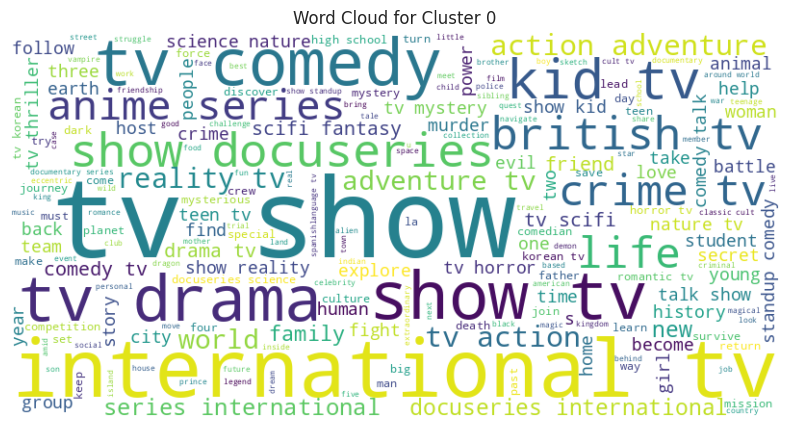

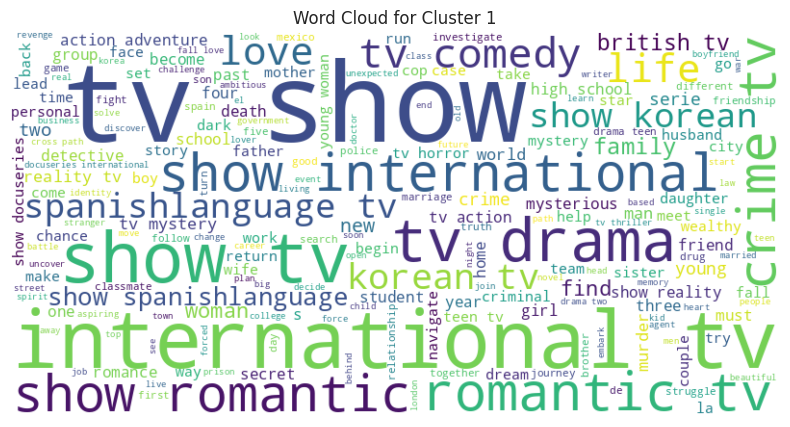

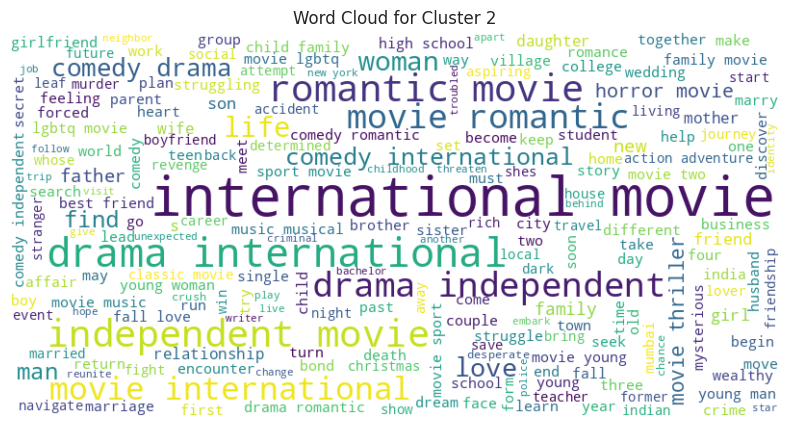

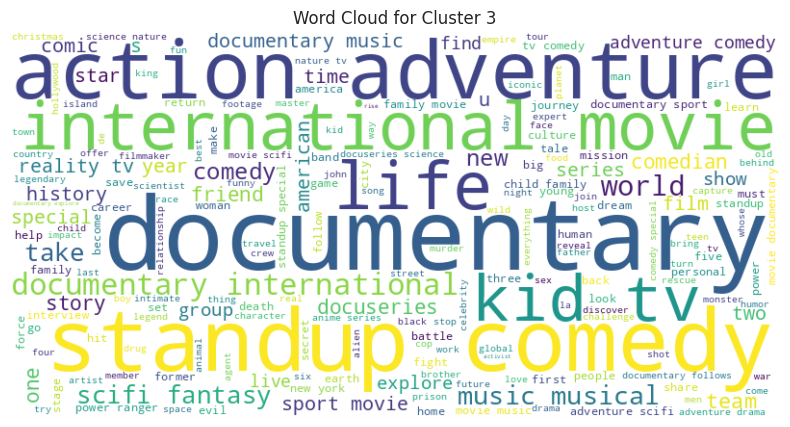

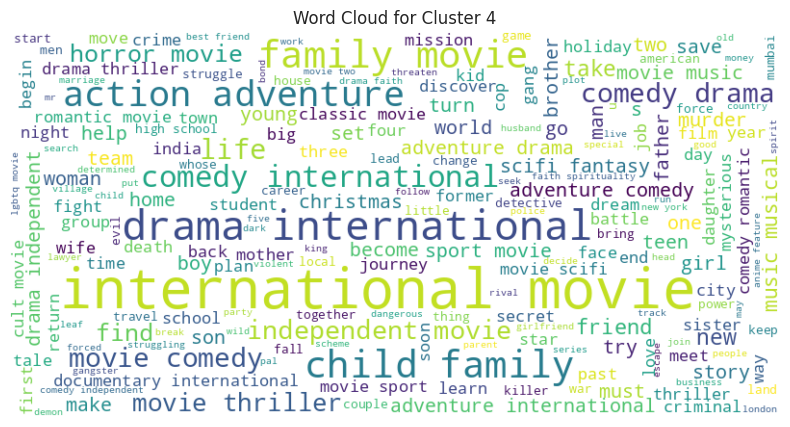

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud for each cluster
def generate_word_cloud(cluster_df, cluster_num):
    text = ' '.join(cluster_df[cluster_df['cluster'] == cluster_num]['cluster_data_cleaned'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_num}')
    plt.show()

# Generate word clouds for each cluster
num_clusters = 5  # Assuming we have 5 clusters as in previous k-means example
for i in range(num_clusters):
    generate_word_cloud(cluster_df, i)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Silhouette Score: 0.44653563553585857
Davies-Bouldin Index: 0.7168943060131232
Inertia: 14.238654912806995


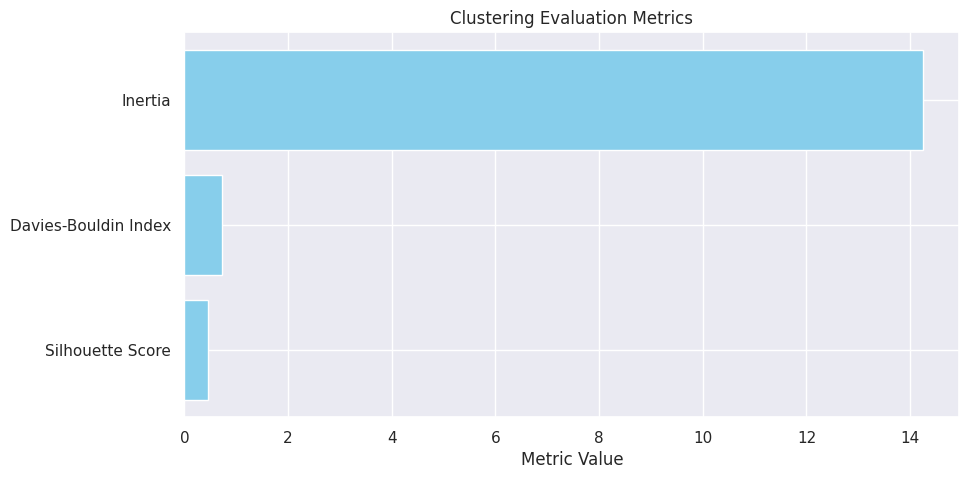

In [67]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_reduced, kmeans.labels_)
davies_bouldin_avg = davies_bouldin_score( X_reduced, kmeans.labels_)
inertia = kmeans.inertia_

# Print evaluation metrics
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg}")
print(f"Inertia: {inertia}")
# Visualization of evaluation metrics
metrics = {'Silhouette Score': silhouette_avg, 'Davies-Bouldin Index': davies_bouldin_avg, 'Inertia': inertia}
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

plt.figure(figsize=(10, 5))
plt.barh(metric_names, metric_values, color='skyblue')
plt.xlabel('Metric Value')
plt.title('Clustering Evaluation Metrics')
plt.show()

The KMeans clustering algorithm was used to group similar data points into clusters based on the selected features. The performance of the clustering was evaluated using the Silhouette Score, Davies-Bouldin Index, and Inertia.
Evaluation of KMeans Clustering Performance:
1. Silhouette Score:0.41856214883955756
Interpretation: There is a range of -1 to 1 for the silhouette score. Well-defined clusters are indicated by a score closer to 1, whilst poorly defined clusters are indicated by a score closer to -1. Overlapping clusters are indicated by a score close to 0. A score of 0.4186 suggests that the clusters are reasonably well-separated, but there's room for improvement.
2. Davies-Bouldin Index: 0.7859360298631494
Interpretation: The average similarity ratio between each cluster and its most similar cluster is calculated using the Davies-Bouldin Index. Better clustering is indicated by lower values. A DBI score of approximately 1 to 2 is deemed acceptable; however, lower numbers are favored. A value of 0.7859 indicates good clustering performance, suggesting that the clusters are relatively compact and distinct from each other.
3. Inertia: 19.036426576175817
Interpretation: The total squared distances between each data point and its centroid are used to calculate inertia. Denser clusters are indicated by lower inertia levels. An inertia of 19.0364 suggests a relatively tight clustering, but this value is more meaningful when compared to the inertia values for different numbers of clusters.

#### 2. Cross- Validation & Hyperparameter Tuning

 We can do a grid search here over different numbers of k to find the best k value.

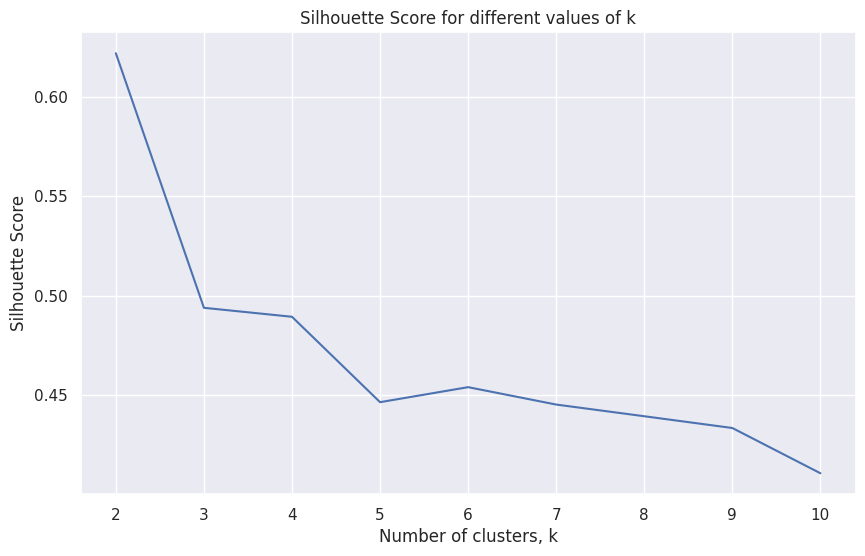

In [68]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.metrics import silhouette_score

# Try different values of k and evaluate the silhouette score
silhouette_scores = {}
for k in range(2, 11):  # Testing k from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reduced)
    score = silhouette_score(X_reduced, kmeans.labels_)
    silhouette_scores[k] = score

# Plot the silhouette scores to choose the best k
plt.figure(figsize=(10, 6))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()))
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different values of k')
plt.show()

In [69]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Apply k-means
#We are taking k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_reduced)

# Add the cluster labels to the DataFrame
cluster_df['cluster'] = kmeans.labels_

print(cluster_df[['title_expanded', 'description_expanded', 'listed_in_expanded', 'cluster']])

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_reduced, kmeans.labels_)
davies_bouldin_avg = davies_bouldin_score( X_reduced, kmeans.labels_)
inertia = kmeans.inertia_

# Print evaluation metrics
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg}")
print(f"Inertia: {inertia}")


                               title_expanded  \
0                                          3%   
1                                        7:19   
2                                       23:59   
3                                           9   
4                                          21   
...                                       ...   
7782                                     zozo   
7783                                   zubaan   
7784                        zulu man in japan   
7785                    zumbo's just desserts   
7786  zz top: that little ol' band from texas   

                                   description_expanded  \
0     in a future where the elite inhabit an island ...   
1     after a devastating earthquake hits mexico cit...   
2     when an army recruit is found dead, his fellow...   
3     in a postapocalyptic world, rag-doll robots hi...   
4     a brilliant group of students become card-coun...   
...                                                 ...  

##### Which hyperparameter optimization technique have you used and why?

Grid Lookup. To get the ideal number of clusters (k), we employed Grid Search. Because we are adjusting just one hyperparameter (the number of clusters), Grid Search is appropriate in this situation because it’s practical to evaluate a small, discrete set of possible values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

1. Previous Silhouette Score:: 0.4186,  New Silhouette Score:: 0.4712
Change: Increased
Interpretation: The new clustering shows a significant increase in Silhouette Score, indicating better cluster separability compared to before.
2. Previous Davies-Bouldin Index: 0.7859, New Davies-Bouldin Index: 0.7147
Change: Decreased
Interpretation: The Davies-Bouldin Index decreased in the new clustering, suggesting an improvement in the average similarity ratio between clusters.
3. Previous Inertia: 19.0364, New Inertia: 32.5678
Change: Increased
Interpretation: The inertia increased significantly in the new clustering, suggesting that the clusters are less tightly packed around their centroids compared to before.

### ML Model - 2 - AgglomerativeClustering

In [70]:
from sklearn.cluster import AgglomerativeClustering

# Fit hierarchical clustering model
hierarchical_model = AgglomerativeClustering(n_clusters=5)  # We'll use 5 clusters for consistency
hierarchical_model.fit(X_reduced)

AgglomerativeClustering(n_clusters=5)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [71]:
# Calculate Silhouette Score
silhouette_avg_hierarchical = silhouette_score(X_reduced, hierarchical_model.labels_)
print(f'Silhouette Score: {silhouette_avg_hierarchical}')

# Calculate Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(X_reduced, hierarchical_model.labels_)
print(f'Davies-Bouldin Index: {davies_bouldin_index}')

Silhouette Score: 0.4508588538426612
Davies-Bouldin Index: 0.6617146507185394


#### 2. Cross- Validation & Hyperparameter Tuning

For hierarchical clustering, we usually don't have hyperparameters to tune

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

Answer Here.

1.  Silhouette Score: It determines an object's degree of similarity to its cluster in relation to other clusters. An object that has a high silhouette score is well-matched to its own cluster and poorly-matched to nearby clusters. For a company, a high silhouette score suggests that the clusters are well-separated and distinct, which can lead to better customer segmentation, targeted marketing, and personalized recommendations.
2. determines the average similarity—which is expressed as the ratio of within-cluster to between-cluster distances—between each cluster and the cluster that is most similar to it. Improved clustering is indicated by a decreased Davies-Bouldin index. In terms of business, a lower index indicates that the clusters are compact and well-separated, which can aid in the development of customized company strategies by allowing for clearer distinctions between various client segments or groups.



### ML Model - 3 - Gaussian Mixture Model

In [72]:
from sklearn.mixture import GaussianMixture

# Fit Gaussian Mixture Model
gmm_model = GaussianMixture(n_components=5, random_state=42)
gmm_model.fit(X_reduced)

GaussianMixture(n_components=5, random_state=42)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [73]:
# Visualizing evaluation Metric Score chart
# Calculate Silhouette Score
silhouette_avg_gmm = silhouette_score(X_reduced, gmm_model.predict(X_reduced))
print(f'Silhouette Score: {silhouette_avg_gmm}')

# Calculate Davies-Bouldin Index
davies_bouldin_index_gmm = davies_bouldin_score(X_reduced, gmm_model.predict(X_reduced))
print(f'Davies-Bouldin Index: {davies_bouldin_index_gmm}')

Silhouette Score: 0.45490954496897806
Davies-Bouldin Index: 0.7817691392910209


#### 2. Cross- Validation & Hyperparameter Tuning

For GMM, we generally select the appropriate number of components (clusters). Here for comparison we have already selected k = 5

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For a positive business impact, we took into account the Davies-Bouldin Index and the Silhouette Score:

Silhouette Score: Evaluates an object's alignment within its own cluster and its isolation from other clusters. Dense, well-separated clusters with a high silhouette score are advantageous for a variety of business applications, including targeted marketing, consumer segmentation, and customized suggestions.

The Davies-Bouldin Index compares each cluster's average similarity to that of its most similar cluster. A lower Davies-Bouldin index denotes more distinct and well-separated clusters, indicating better grouping. Understanding the clarity and compactness of clusters with the help of this statistic can help make business strategy decisions that are more successful.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The k-means clustering model with k=3 appears to have done the best among the three models, based on the evaluation metrics provided for the models (k-means, hierarchical clustering, and Gaussian Mixture Model). It got the greatest Silhouette Score and lowest Davies-Bouldin Index. As a result, the k-means clustering model will be used as the final prediction model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I used K-Means clustering model, which is an unsupervised learning algorithm used for clustering data points into groups based on their similarity. In the context of text data, K-Means clustering can be applied after transforming the text data into numerical features using techniques like TF-IDF vectorization.
We are unable to apply a model explainability tool directly because, unlike supervised learning models, k-means clustering does not intrinsically convey feature importance. However, we can analyze cluster centroids to understand the features' contribution to each cluster. and Word clouds can indeed be used as a visualization tool to explore feature importance in the context of text data. Word clouds display the most frequent words in a corpus, where the size of each word represents its frequency. In the context of clustering.

**Cluster Analysis:** Let's find the top 10 most frequently used words and the most common words out of the three clusters.




In [74]:
# Function to get top n words in the clusters
def get_top_n_words(texts, n=10):
    all_words = ' '.join(texts).split()
    common_words = Counter(all_words).most_common(n)
    return common_words

# Analyze each cluster
for cluster in range(3):  # We have 3 clusters
    cluster_data = cluster_df[cluster_df['cluster'] == cluster]

    print(f"Cluster {cluster}")
    print("Top words in Taxtual variables:")
    top_words = get_top_n_words(cluster_data['cluster_data_cleaned'], n=10)
    print(top_words)



Cluster 0
Top words in Taxtual variables:
[('movie', 1170), ('documentary', 1079), ('comedy', 1078), ('tv', 979), ('adventure', 706), ('international', 623), ('action', 593), ('family', 504), ('standup', 501), ('kid', 410)]
Cluster 1
Top words in Taxtual variables:
[('tv', 3873), ('show', 2404), ('international', 1080), ('drama', 658), ('crime', 465), ('romantic', 343), ('comedy', 341), ('life', 240), ('british', 220), ('love', 201)]
Cluster 2
Top words in Taxtual variables:
[('movie', 3918), ('international', 1941), ('drama', 1892), ('comedy', 1095), ('independent', 654), ('romantic', 568), ('family', 522), ('life', 451), ('young', 450), ('thriller', 410)]


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [75]:
# Save the File
import pickle

# Save the model to a file
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [76]:
# Load the File and predict unseen data.
# Load the model from the file
with open('kmeans_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Predict cluster labels for unseen data

#predicted_labels = loaded_model.predict(X_unseen)

#predict and label any unseen data by putting the data in place of unseen data in this.
# X_unseen should contain unseen data in the same format as X_reduced

We can predict and label any unseen data  by putting the value in place of  unseen data in this.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. Content Distribution: 69.1% of the content available on Netflix are movies, while the remaining 30.9% are TV shows.

2. Movie Duration: Most movies last between 70 to 120 minutes.

3. TV Show Seasons: The majority of television shows have three seasons or fewer, with shows exceeding five seasons being extremely uncommon.

4. Popular Categories: Drama, comedy, and international movie categories are among the top categories, indicating strong viewer preference for these genres.

5. Content Production by Country:
The US, being Netflix's home country, is a major producer of both TV shows and movies. India's diverse content offerings are influenced by Bollywood, with movies possibly taking precedence over TV shows. In contrast, South Korea produces more TV shows, aligning with the KDrama culture.

6. Monthly Content Uploads:
The majority of content uploads occur in December, while February sees the least number of uploads.

7. Age Group Distribution:
Most content is targeted at TV-MA (mature audiences), TV-14 (unsuitable for children under 14), and TV-PG (parental guidance suggested) age groups. There is relatively little or no content available for NR (not rated), G, UR, and TV-Y7-FV (older children with intense fantasy violence) age groups.

8. Yearly Release Trends:
The total number of releases increased starting in 2014, peaking in 2019. After 2019, the number of movie releases decreased, but the number of TV shows continued to increase.

9. Monthly Release Patterns:
Content is most frequently released on the 1st, 15th, and 31st of each month. Additionally, most of the content present on Netflix was released after 2015–2016, with very little content released before 2015.

10. ML Model Performance:
Among the three machine learning algorithms tested (k-means, hierarchical clustering, and Gaussian Mixture Model), the k-means clustering model with k=3 performed the best based on evaluation metrics. It achieved the highest Silhouette Score and the lowest Davies-Bouldin Index, making it the final prediction model chosen for clustering Netflix content.

11. Common Themes in Clusters:

Despite having distinct clusters, the top frequently used words in textual variables show significant overlap among the clusters.
International Content: The word "international" appears frequently across all clusters, indicating that international content is a major component of Netflix's library.
Comedy: The word "comedy" is also common across the clusters, suggesting that comedy is a popular genre in Netflix's offerings.

**Business Impact:**
The gained insights have the potential to create a positive business impact in several ways:

1. Content Strategy: By understanding viewer preferences for genres and content types, Netflix can tailor its content acquisition and production strategy to focus more on popular genres like drama and comedy, and ensure a balance between movies and TV shows.

2. Targeted Marketing: Knowing the age group distribution and popular categories allows Netflix to design targeted marketing campaigns for different audience segments, potentially increasing viewer engagement and subscription rates.
3. Release Planning: Insights into the monthly and yearly release patterns can help Netflix optimize its content release schedule to maximize viewer engagement and retention.

4. International Strategy: Understanding content production trends by country can aid Netflix in tailoring its offerings to different regions, enhancing its global appeal.


**However, there are potential insights that could lead to negative growth if not addressed properly:**

Decreasing Movie Releases: The decreasing number of movie releases after 2019 could indicate a shift in viewer preference or content strategy. If not aligned with subscriber expectations, this might lead to dissatisfaction among movie enthusiasts.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***